# ------------------------------------------------------------------------------

# Challenge des Dauphins

https://community.jmp.com/t5/Groupe-francophone-des/Challenge-JMP/td-p/18821

L'espèce de dauphins sur laquelle porte cette analyse n'a pas été fournie.




Partie I : 

    Importez vos données 
    Libriairies
    Fonction
    Ouverture fichier
    Pre traitrement
    

Partie II :

    Analyse univariée
    Analyse bivariée et multivariée
    
        
Partie III : 

    Statistique 

Partie IV :

    Questions sur le comportement des dauphins


# ------------------------------------------------------------------------------

#  I. Librairie et Fonctions


In [72]:
import pandas                      as pd
import matplotlib.pyplot           as plt
import seaborn                     as sns
import numpy                       as np
#pd.options.mode.chained_assignment = None
%matplotlib inline

str_repertoire="/Analyse Temperature Europe/.."

def convertir_horaire_presentee(horaire, le_choix="HM"):
    '''
    Permet de recupérer l'heure :
        Soit en hh:mm le_choix  ='HM'
        Soit en hh    le_choix <>'HM'
    '''
    objet_renvoye=""
    heures = horaire * 24 # regle de 3 pour identifier l'heure
    heures_int = int(heures) # convertion en int de l'heure
    minutes = (heures - heures_int) * 60 #
    minutes_int = int(minutes)
    if le_choix=="HM":
        objet_renvoye=str(heures_int)+"h"+str(minutes_int)
    else:
        objet_renvoye=heures_int
    return objet_renvoye

import warnings

warnings.filterwarnings('ignore')

## I.1 Ouverture fichier des données issus du site www.jmp.com

In [73]:
fichier=pd.read_csv(str_repertoire +"Challenge_Dauphin.csv", 
                    )
print("Le fichier d'origine comportait 3 onglets que j'ai mergé puis transformé en fichier csv.")

Le fichier d'origine comportait 3 onglets que j'ai mergé puis transformé en fichier csv.


In [74]:
fichier.describe(include='all')

,ID,Jour,Instant,Distance,Nombre d'individus,Presence de bebes,Categorie Type Bateau,Vitesse de nage Km/h,Taux de reorientation deg/min,Indice de Linearite,Comportement
count,1.670000e+02,167,167.000000,167.000000,167.000000,167.000000,165,167.000000,167.000000,167,167
unique,NaN,3,NaN,NaN,NaN,NaN,9,NaN,NaN,165,6
top,NaN,Jour 1,NaN,NaN,NaN,NaN,Petit,NaN,NaN,NONE,Alimentation au crevettier
freq,NaN,66,NaN,NaN,NaN,NaN,36,NaN,NaN,3,54
mean,1.062445e+06,NaN,0.452695,153.211456,4.293413,0.209581,NaN,2.317393,40.930918,NaN,NaN
std,1.417375e+06,NaN,0.181962,70.788631,2.418083,0.408234,NaN,1.445866,26.921142,NaN,NaN
min,4.143340e+05,NaN,0.100000,19.072047,1.000000,0.000000,NaN,0.317786,1.894432,NaN,NaN
25%,4.144320e+05,NaN,0.300000,94.732235,2.000000,0.000000,NaN,1.170559,18.755100,NaN,NaN
50%,4.147790e+05,NaN,0.500000,149.346684,4.000000,0.000000,NaN,2.008277,35.911754,NaN,NaN
75%,4.150335e+05,NaN,0.600000,201.726868,5.000000,0.000000,NaN,3.366047,57.575723,NaN,NaN


# I.2 Analyse nettoyage, fiabilisation des données

## Quels sont les types de données ?

In [75]:
fichier.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   ID                             167 non-null    int64  
 1   Jour                           167 non-null    object 
 2   Instant                        167 non-null    float64
 3   Distance                       167 non-null    float64
 4   Nombre d'individus             167 non-null    int64  
 5   Presence de bebes              167 non-null    int64  
 6   Categorie Type Bateau          165 non-null    object 
 7   Vitesse de nage Km/h           167 non-null    float64
 8   Taux de reorientation deg/min  167 non-null    float64
 9   Indice de Linearite            167 non-null    object 
 10  Comportement                   167 non-null    object 
dtypes: float64(4), int64(3), object(4)
memory usage: 14.5+ KB


    
    DESCRIPTION DES DONNEES :
    
    Id                            : Identifiant de l'appareil ayant relevé l'information

    Jour                          : Les données ont été recupérées sur 3 jours (3 onglets dans le fichier excel).
                                  Nous n'avons pas la date ; Jour1, jour2, et jour3
                        
    Instant                       : C'est un horodatage à transcrire en heure , minute

    Distance                      : Distance parcourue durant la prise de mesure d'un groupe de dauphin

    Nombre d'individu             : Le nombre de dauphin observé dans le groupe

    Présence de bébé              : Présence 1 ou pas 0 de bébé dans le groupe observé

    Catégorie Type Bateau         : Type de bateau large, petit ,moyen, crevettier ou tourisme. 
                                   Ici il y a un mélange entre la taille et le type de bateau

    Vitesse de nage Km/h          : Vitesse du groupe d'individu

    Taux de réorientation deg/min : Identifie l'absence de linéarité dans la nage du groupe. 
                                    La rotation peut exprimer un jeu, la presence d'un obstacle la peur, etc..
                        
    Indice de linéarité           : Décrit une course, un objectif à atteindre un point d'arrivée definis

    Comportement                  : Décrit l'action le comportement du groupe de dauphin 


## Type de données

    L'indice de linéarité devrait être un integer/float alors qu'il apparait en tant qu'object ; il y a un problème :

In [76]:
fichier.sort_values("Indice de Linearite")["Indice de Linearite"]

17     0.004121545
11     0.013915177
143    0.032710281
43     0.056686135
155     0.06114299
          ...     
70     0.995113294
37     0.997525697
15            NONE
27            NONE
50            NONE
Name: Indice de Linearite, Length: 167, dtype: object

On supprime les valeurs aberrantes !

In [77]:
print("Suppression des valeurs abérrantes dans l'indice de linéarité !")
fichier=fichier[fichier['Indice de Linearite']!='NONE']

Suppression des valeurs abérrantes dans l'indice de linéarité !


In [78]:
# Il faut changer le type de la présence d'individus
print("")
# Il faut changer le type d'indice de linéarité
fichier['Indice de Linearite']=fichier['Indice de Linearite'].astype('float')
print("Le type pour la variable 'Indice de linéarité' (object) est modifié en float. ")


Le type pour la variable 'Indice de linéarité' (object) est modifié en float. 


### Quelle est l'unité pour la vitesse des dauphins ?

    Supposons que la vitesse soit exprimée en km/h (c'est l'intitulé de la variable d'ailleurs).

    Calculons la moyenne par type de déplacement
    

In [79]:
fichier.groupby(['Comportement']).agg({'Vitesse de nage Km/h':'mean'}).round(1)

,Vitesse de nage Km/h
Comportement,
Alimentation au crevettier,3.5
Alimentation en mer,1.7
Deplacement lent,1.8
Deplacement rapide,2.9
Sociabilisation,1.7
Sociabilization,1.6


In [80]:
print("Moyenne de nage pour tous types de deplacements (km/h) :",fichier['Vitesse de nage Km/h'].mean().round(1))

Moyenne de nage pour tous types de deplacements (km/h) : 2.3


=> D'apres le site Wikipedia, la vitesse d'un dauphin se situe autour de  10 km/h.

https://fr.wikipedia.org/wiki/Dauphin_%C3%A0_nez_blanc

L'unité de la variable "Vitesse de nage" ne peut être en Km/h ; c'est probablement en m/s.

Vérifions :

    La conversion d'un déplacement rapide en Km/h donne : 2.9 *3.6=10.44 km/h.

Conclusion :

     Ce chiffre est cohérent ; la vitesse est donnée en m/s.

In [81]:
print("Distance moyenne",fichier['Distance'].mean().round(0))

Distance moyenne 154.0


=> Si la vitesse moyenne d'un dauphin est de 10 km/h soit 2.9 m/s, peut-on envisager que la distance fournie soit en metre ?

In [82]:
fichier.groupby(['Comportement']).agg({'Distance':'mean'}).round(1)

,Distance
Comportement,
Alimentation au crevettier,172.1
Alimentation en mer,114.5
Deplacement lent,175.6
Deplacement rapide,147.3
Sociabilisation,161.5
Sociabilization,155.0


Une durée de 18 secondes pour parcourir 150 metres environ, soit 8,28 km/h reste cohérent.

Conclusion : la distance est bien donnée en metre et la vitesse en m/s.


Modifions le libelle des variables en conséquence.

In [83]:
fichier.rename(columns={'Vitesse de nage Km/h':'Vitesse de nage (m/s)'},inplace=True)
fichier.rename(columns={'Distance':'Distance (m)'},inplace=True)

Présence de doublon ?

In [84]:
#Doublon ?
fichier[fichier.duplicated()]

,ID,Jour,Instant,Distance (m),Nombre d'individus,Presence de bebes,Categorie Type Bateau,Vitesse de nage (m/s),Taux de reorientation deg/min,Indice de Linearite,Comportement


Valeurs manquantes ?

<Axes: >

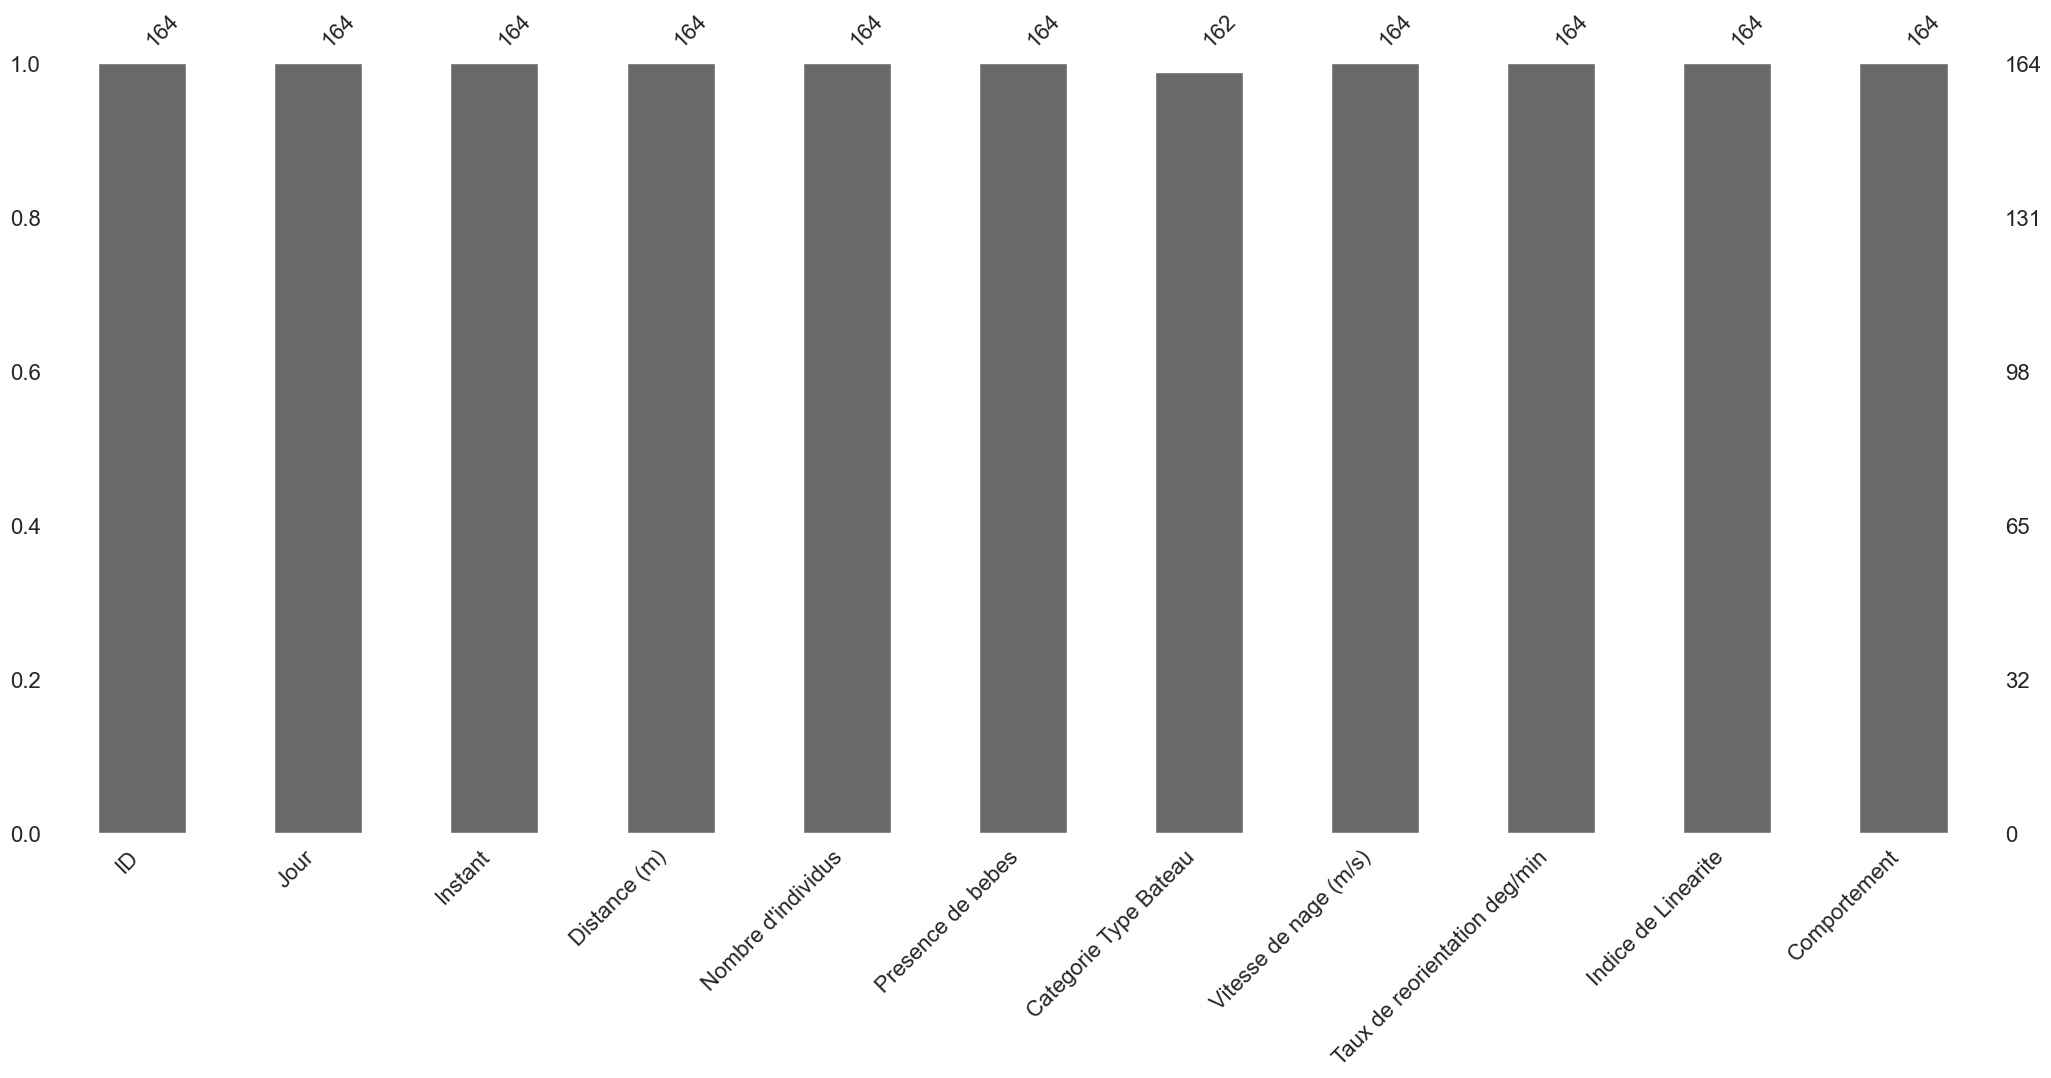

In [85]:
import missingno as meno
meno.bar(fichier)

Quelles sont les différentes valeurs des instants ?

In [86]:
fichier['Instant'].value_counts().sort_index()

Instant
0.1     3
0.2    28
0.3    18
0.4    31
0.5    38
0.6    22
0.7    17
0.8     4
0.9     3
Name: count, dtype: int64

Conversion en heure de l'instant

In [87]:
# J'appelle la fonction pour avoir les horraires en format H/m
fichier['Instant_h_m']=fichier['Instant'].apply(convertir_horaire_presentee)
# J'appele la fonction pour recuperer l'heure uniquement
fichier['Instant_h']=fichier['Instant'].apply(convertir_horaire_presentee,"")

Fiabilisation des éléments comportementaux.

Plusieurs orthogaphes pour une même modalité ! Il faut corriger !

In [88]:
fichier['Comportement'].value_counts().sort_index()

Comportement
Alimentation au crevettier    54
Alimentation en mer           40
Deplacement lent              14
Deplacement rapide             5
Sociabilisation               47
Sociabilization                4
Name: count, dtype: int64

Correction apportée pour la Sociabilisation

In [89]:
#print("")
# Condition pour mettre à jour la colonne
condition = fichier['Comportement'] == 'Sociabilization'
# Attribuer une valeur à la colonne en fonction de la condition
fichier.loc[condition, 'Comportement'] = 'Sociabilisation'


## Fiabilisation des données relatives au type de bateau

Certaines modalités pour le type de bateau n'ont pas une orthographe homogène.

D'autres sont incohérentes ou n'ont pas de sens !

In [90]:
fichier['Categorie Type Bateau'].value_counts().sort_index()

Categorie Type Bateau
Aucun                    25
Crevetier                 1
Crevettier               30
Crevettier + Tourisme    24
Large                     8
Moyen                    17
Petit                    36
Tourism                   1
Tourisme                 20
Name: count, dtype: int64

In [91]:
# Bateau de type "Aucun" ? Cela signifie quoi ?
fichier[fichier['Categorie Type Bateau']=='Aucun'].groupby(["Categorie Type Bateau",
            "Comportement"],as_index=False).agg({'Vitesse de nage (m/s)':'mean'})


,Categorie Type Bateau,Comportement,Vitesse de nage (m/s)
0,Aucun,Alimentation en mer,1.120328
1,Aucun,Deplacement lent,3.109722
2,Aucun,Deplacement rapide,1.006410
3,Aucun,Sociabilisation,1.527588


La vitesse de nage d'un déplacement "lent" est plus rapide qu'un déplacement "rapide" !

Le déplacement "rapide" est plus lent que le déplacement dans le cadre "d'une alimentation en mer" !


En Conclusion : 
                
                Le type de bateau 'Aucun' possède des valeurs incohérentes pour les 3/4 des modalités du comportement.

                Il faut supprimer cette modalité !


In [92]:
df=fichier[fichier['Categorie Type Bateau']!='Aucun'].groupby(["Categorie Type Bateau",
            "Comportement"],as_index=False).agg({'Vitesse de nage (m/s)':'mean'})
df.query("Comportement=='Alimentation en mer' or Comportement=='Sociabilisation'").sort_values(["Comportement",
        "Vitesse de nage (m/s)"])


,Categorie Type Bateau,Comportement,Vitesse de nage (m/s)
5,Large,Alimentation en mer,1.353683
7,Moyen,Alimentation en mer,1.488176
10,Petit,Alimentation en mer,1.491492
2,Crevettier,Alimentation en mer,2.434970
16,Tourisme,Alimentation en mer,2.920918
19,Tourisme,Sociabilisation,1.364794
6,Large,Sociabilisation,1.523143
13,Petit,Sociabilisation,1.830078
9,Moyen,Sociabilisation,1.870595
4,Crevettier + Tourisme,Sociabilisation,3.573180


Suppression et harmonisation des données.

In [93]:
# Condition pour mettre à jour la colonne
condition = fichier['Categorie Type Bateau'] == 'Tourism'
# Attribuer une valeur à la colonne en fonction de la condition
fichier.loc[condition, 'Categorie Type Bateau'] = 'Tourisme'

# Condition pour mettre à jour la colonne
condition = fichier['Categorie Type Bateau'] == 'Crevetier'
# Attribuer une valeur à la colonne en fonction de la condition
fichier.loc[condition, 'Categorie Type Bateau'] = 'Crevettier'

# On supprime les valeurs aberrantes
fichier=fichier[fichier['Categorie Type Bateau']!='Crevettier + Tourisme']
fichier=fichier[fichier['Categorie Type Bateau']!='None']
fichier=fichier[fichier['Categorie Type Bateau']!='Aucun']

fichier['Categorie Type Bateau'].value_counts().sort_index()

Categorie Type Bateau
Crevettier    31
Large          8
Moyen         17
Petit         36
Tourisme      21
Name: count, dtype: int64

# II. Analyse descriptive univariée

## II.1 Analyse descriptive univariée des variables quantitatives

Distance (m) n° 1
nb outlier


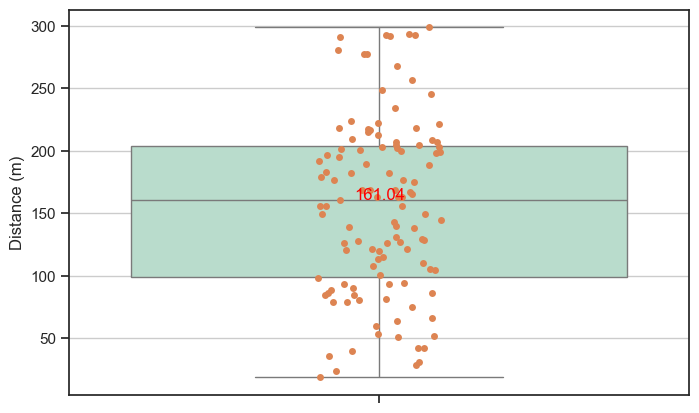

Nombre d'individus n° 2
nb outlier
outlier id 414854.0 Nombre de dauphin 10.0 Vitesse  3.0 heure Taux reorientation 44.4 Distance 121.6
outlier id 414861.0 Nombre de dauphin 10.0 Vitesse  1.7 heure Taux reorientation 27.9 Distance 139.0
outlier id 414861.0 Nombre de dauphin 10.0 Vitesse  2.9 heure Taux reorientation 35.7 Distance 105.4
outlier id 414894.0 Nombre de dauphin 10.0 Vitesse  1.4 heure Taux reorientation 48.5 Distance 50.9


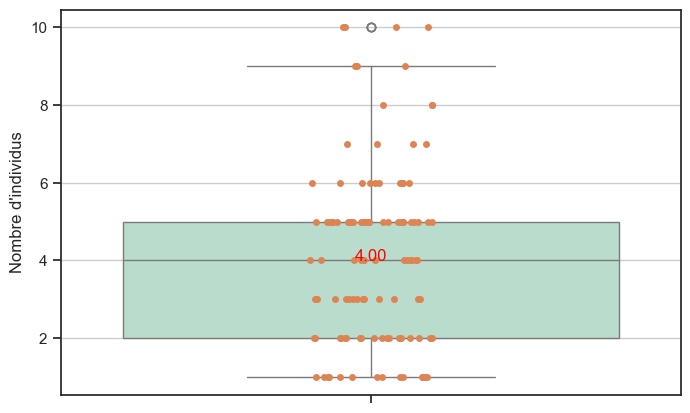

Vitesse de nage (m/s) n° 3
nb outlier
outlier id 414352.0 Nombre de dauphin 1.0 Vitesse  9.7 heure Taux reorientation 86.3 Distance 110.3


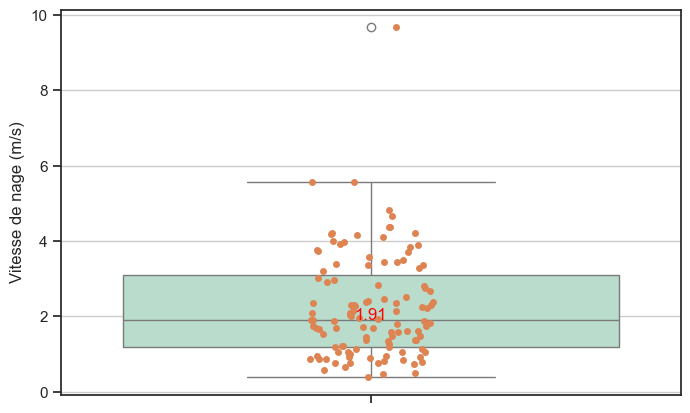

Taux de reorientation deg/min n° 4
nb outlier


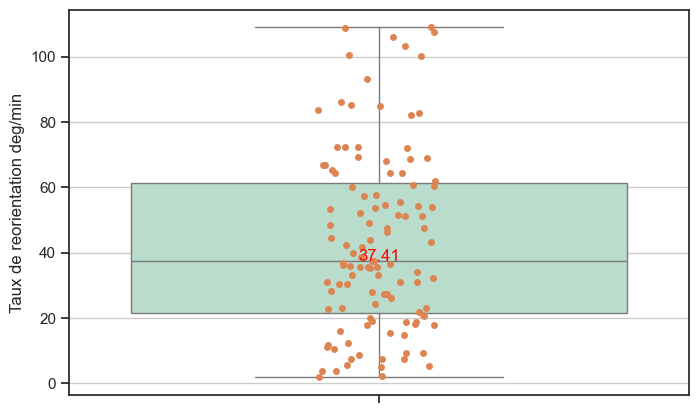

Indice de Linearite n° 5
nb outlier


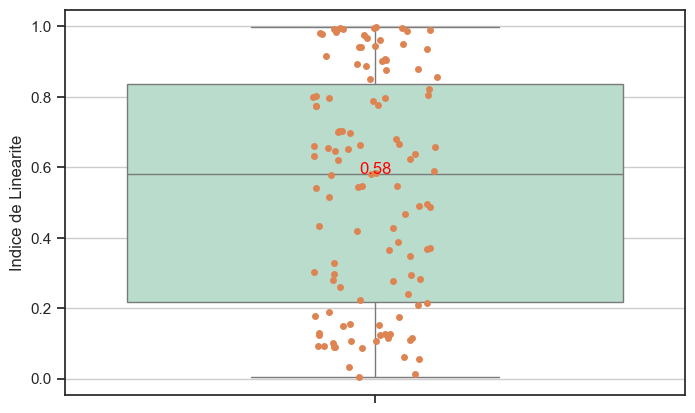

In [94]:
# Analyse descriptive univariée des variables quantitatives

# Sélection des variables quantitatives
quant_vars = fichier.select_dtypes(include=['float64', 'int64'])
axe_abscisse=8
axe_ordonnee=5
# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
enumere=0
for var in quant_vars:
    if var!='ID' and var!='Instant' and var!='Presence de bebes':
        enumere=enumere+1
        print(var,"n°",enumere)
        #Quelle est la mediane ?
        la_mediane=quant_vars[var].median()
        plt.figure(figsize=(axe_abscisse,axe_ordonnee))
        plt.grid()
        box=sns.boxplot(y=var, data=quant_vars, palette="Pastel2" ) 
        box=sns.stripplot( y=var,data=quant_vars)
        # Identifiez les outliers borne supérieure :
        delta= 1.5*(quant_vars[var].quantile(0.75) - quant_vars[var].quantile(0.25))
        outliers = quant_vars[(quant_vars[var] > (quant_vars[var].quantile(0.75) + delta)) | (quant_vars[var] < (quant_vars[var].quantile(0.25) - delta))]
        print("nb outlier",)
        
        for i, outlier in outliers.iterrows():
            #box.annotate(str(outlier["ID"]), xy=(0, outlier[var]), color="red", fontsize=10);val1=str(outlier["var"])
            val1=str(outlier["Nombre d'individus"]) ;val2=str(outlier["Vitesse de nage (m/s)"].round(1))
            val4=str(outlier['Taux de reorientation deg/min'].round(1))
            val5=str(outlier['Distance (m)'].round(1))
            print('outlier id',str(outlier["ID"]),
                  "Nombre de dauphin",val1,"Vitesse ",val2,"heure","Taux reorientation",val4,"Distance",val5) #
 
        box.annotate(str("{:.2f}".format(la_mediane)),xy=(0,la_mediane),horizontalalignment='center', color="red")
        
        plt.show()

Conclusion :
        
Presence d'outlier uniquement pour les variables Vitesse et distance.

Distance (m) n° 1


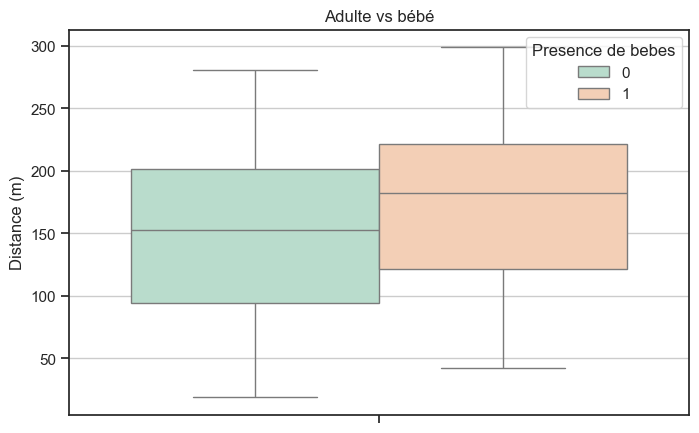

Nombre d'individus n° 2


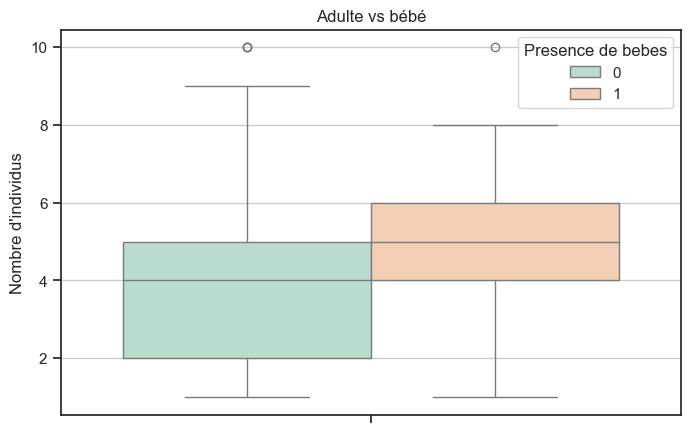

Vitesse de nage (m/s) n° 3


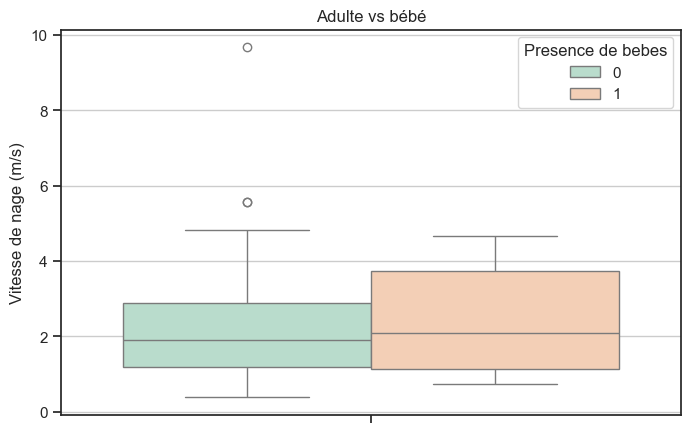

Taux de reorientation deg/min n° 4


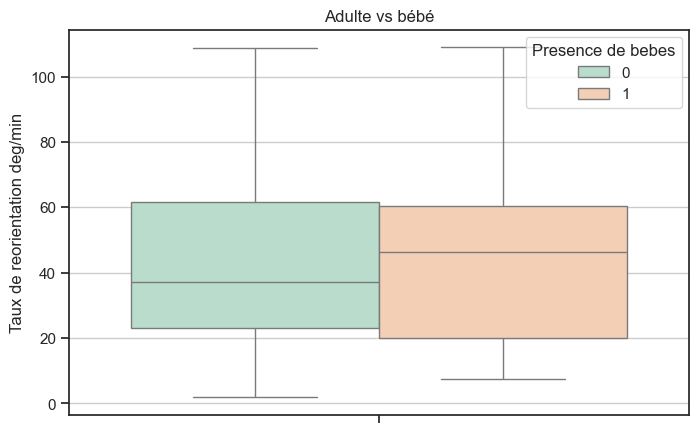

Indice de Linearite n° 5


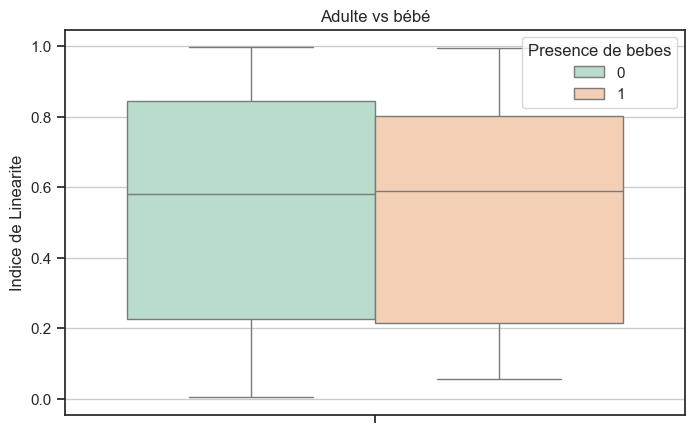

In [95]:
# Sélection des variables quantitatives
quant_vars = fichier.select_dtypes(include=['float64', 'int64'])
axe_abscisse=8
axe_ordonnee=5
# Tracé des boxplots pour chaque variable quantitative avec Seaborn
sns.set(style="ticks")
enumere=0
for var in quant_vars:
    if var!='ID' and var!='Instant' and var!='Presence de bebes':
        enumere=enumere+1
        print(var,"n°",enumere)
        #Quelle est la mediane ?
        la_mediane=quant_vars[var].median()
        plt.figure(figsize=(axe_abscisse,axe_ordonnee))
        plt.grid()
        box=sns.boxplot(y=var, data=quant_vars, hue=fichier['Presence de bebes'],palette="Pastel2" ) 
        plt.title("Adulte vs bébé")
        #box=sns.stripplot( y=var,data=quant_vars)        
        plt.show()

Conclusion :

Les groupes de dauphins ayant des bébés et sans bébé ont des distributions assez proches pour les variables  'indice de linéarité' et 'taux de réorientation'.

La vitesse est plus importante pour le groupe comportant des bébés et leur nombre est plus important que le groupe des adultes.

## II. 2 Analyse descriptive univariée des variables qualitatives

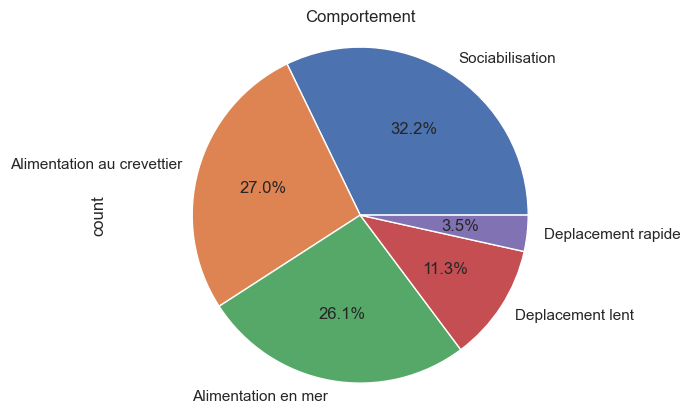

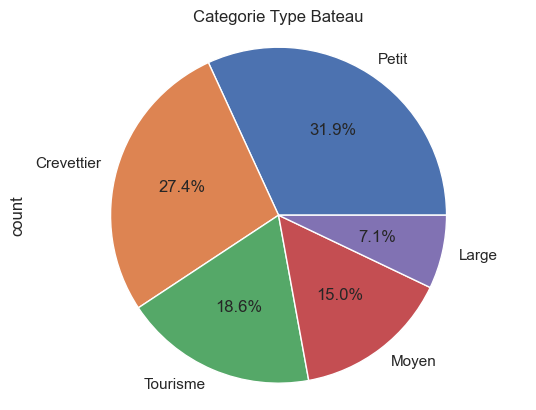

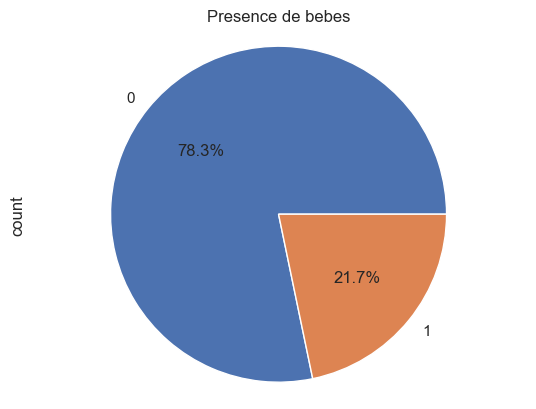

In [96]:
# Sélectionner les variables catégorielles
cat_vars = ['Comportement', 'Categorie Type Bateau', 'Presence de bebes']


# Générer un pie plot pour chaque variable catégorielle
for var in cat_vars:
    fichier[var].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(var)
    plt.axis('equal')
    plt.show()

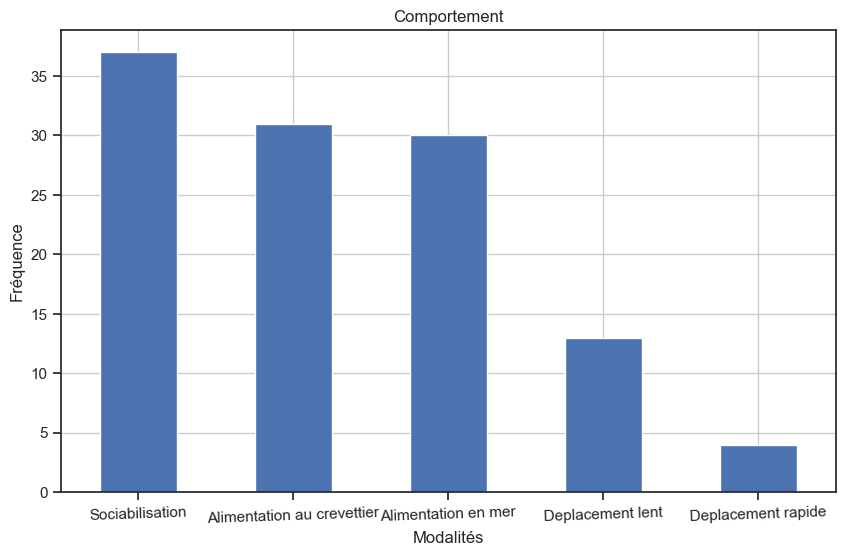

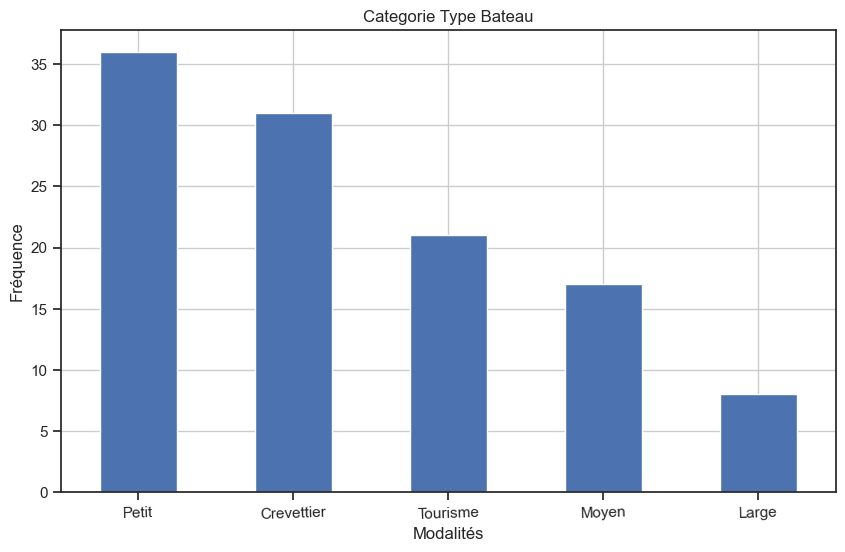

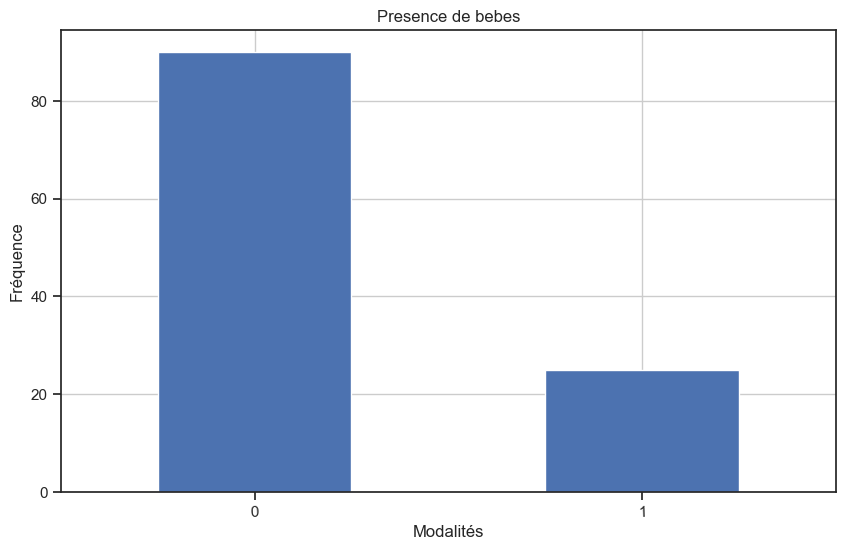

In [97]:
# Générer un bar plot pour chaque variable catégorielle
axe_abscisse=10;axe_ordonnee=6
for var in cat_vars:
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    fichier[var].value_counts().plot(kind='bar',)
    plt.title(var)
    plt.xlabel('Modalités')
    plt.ylabel('Fréquence')
    plt.grid()
    
    plt.xticks(rotation=2)
    plt.show()

## II 3. Analyse 

### Analyse bivariée - Variable catégorielle

<Figure size 1000x2000 with 0 Axes>

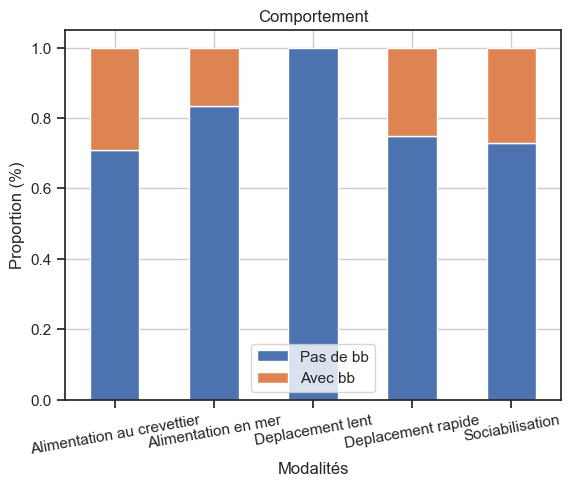

<Figure size 1000x2000 with 0 Axes>

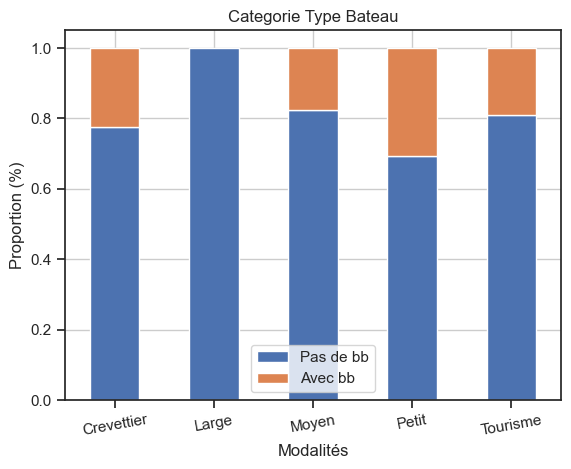

<Figure size 1000x2000 with 0 Axes>

In [98]:
axe_abscisse=10;axe_ordonnee=20
for var in cat_vars:
    #figsize = (20, 20)
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    if var!="Presence de bebes":        
        (fichier.groupby([var, 
        'Presence de bebes'])['Presence de bebes'].count()/fichier.groupby([var])[var].count()).unstack(level=1).plot(
            kind='bar', stacked=True)
        plt.title(var)
        plt.xlabel('Modalités')
        plt.ylabel('Proportion (%)')
        plt.legend(['Pas de bb','Avec bb'])
        plt.xticks(rotation=10)
        plt.grid()
        plt.show()

Conclusion :

    Pas de déplacement lent du groupe si présence de bébés dauphins.

    Pas de bébés dauphins dans le groupe si présence d'un bateau "large"
    

## II 3. Analyse multivariée - Variable numérique

### Pairplot

Il n'y a pas assez de données lorsqu'il y a une présence de bébé.
Il semble qu'il y a une relation linéaire entre l'indice de linéarité et le taux de réorientation.


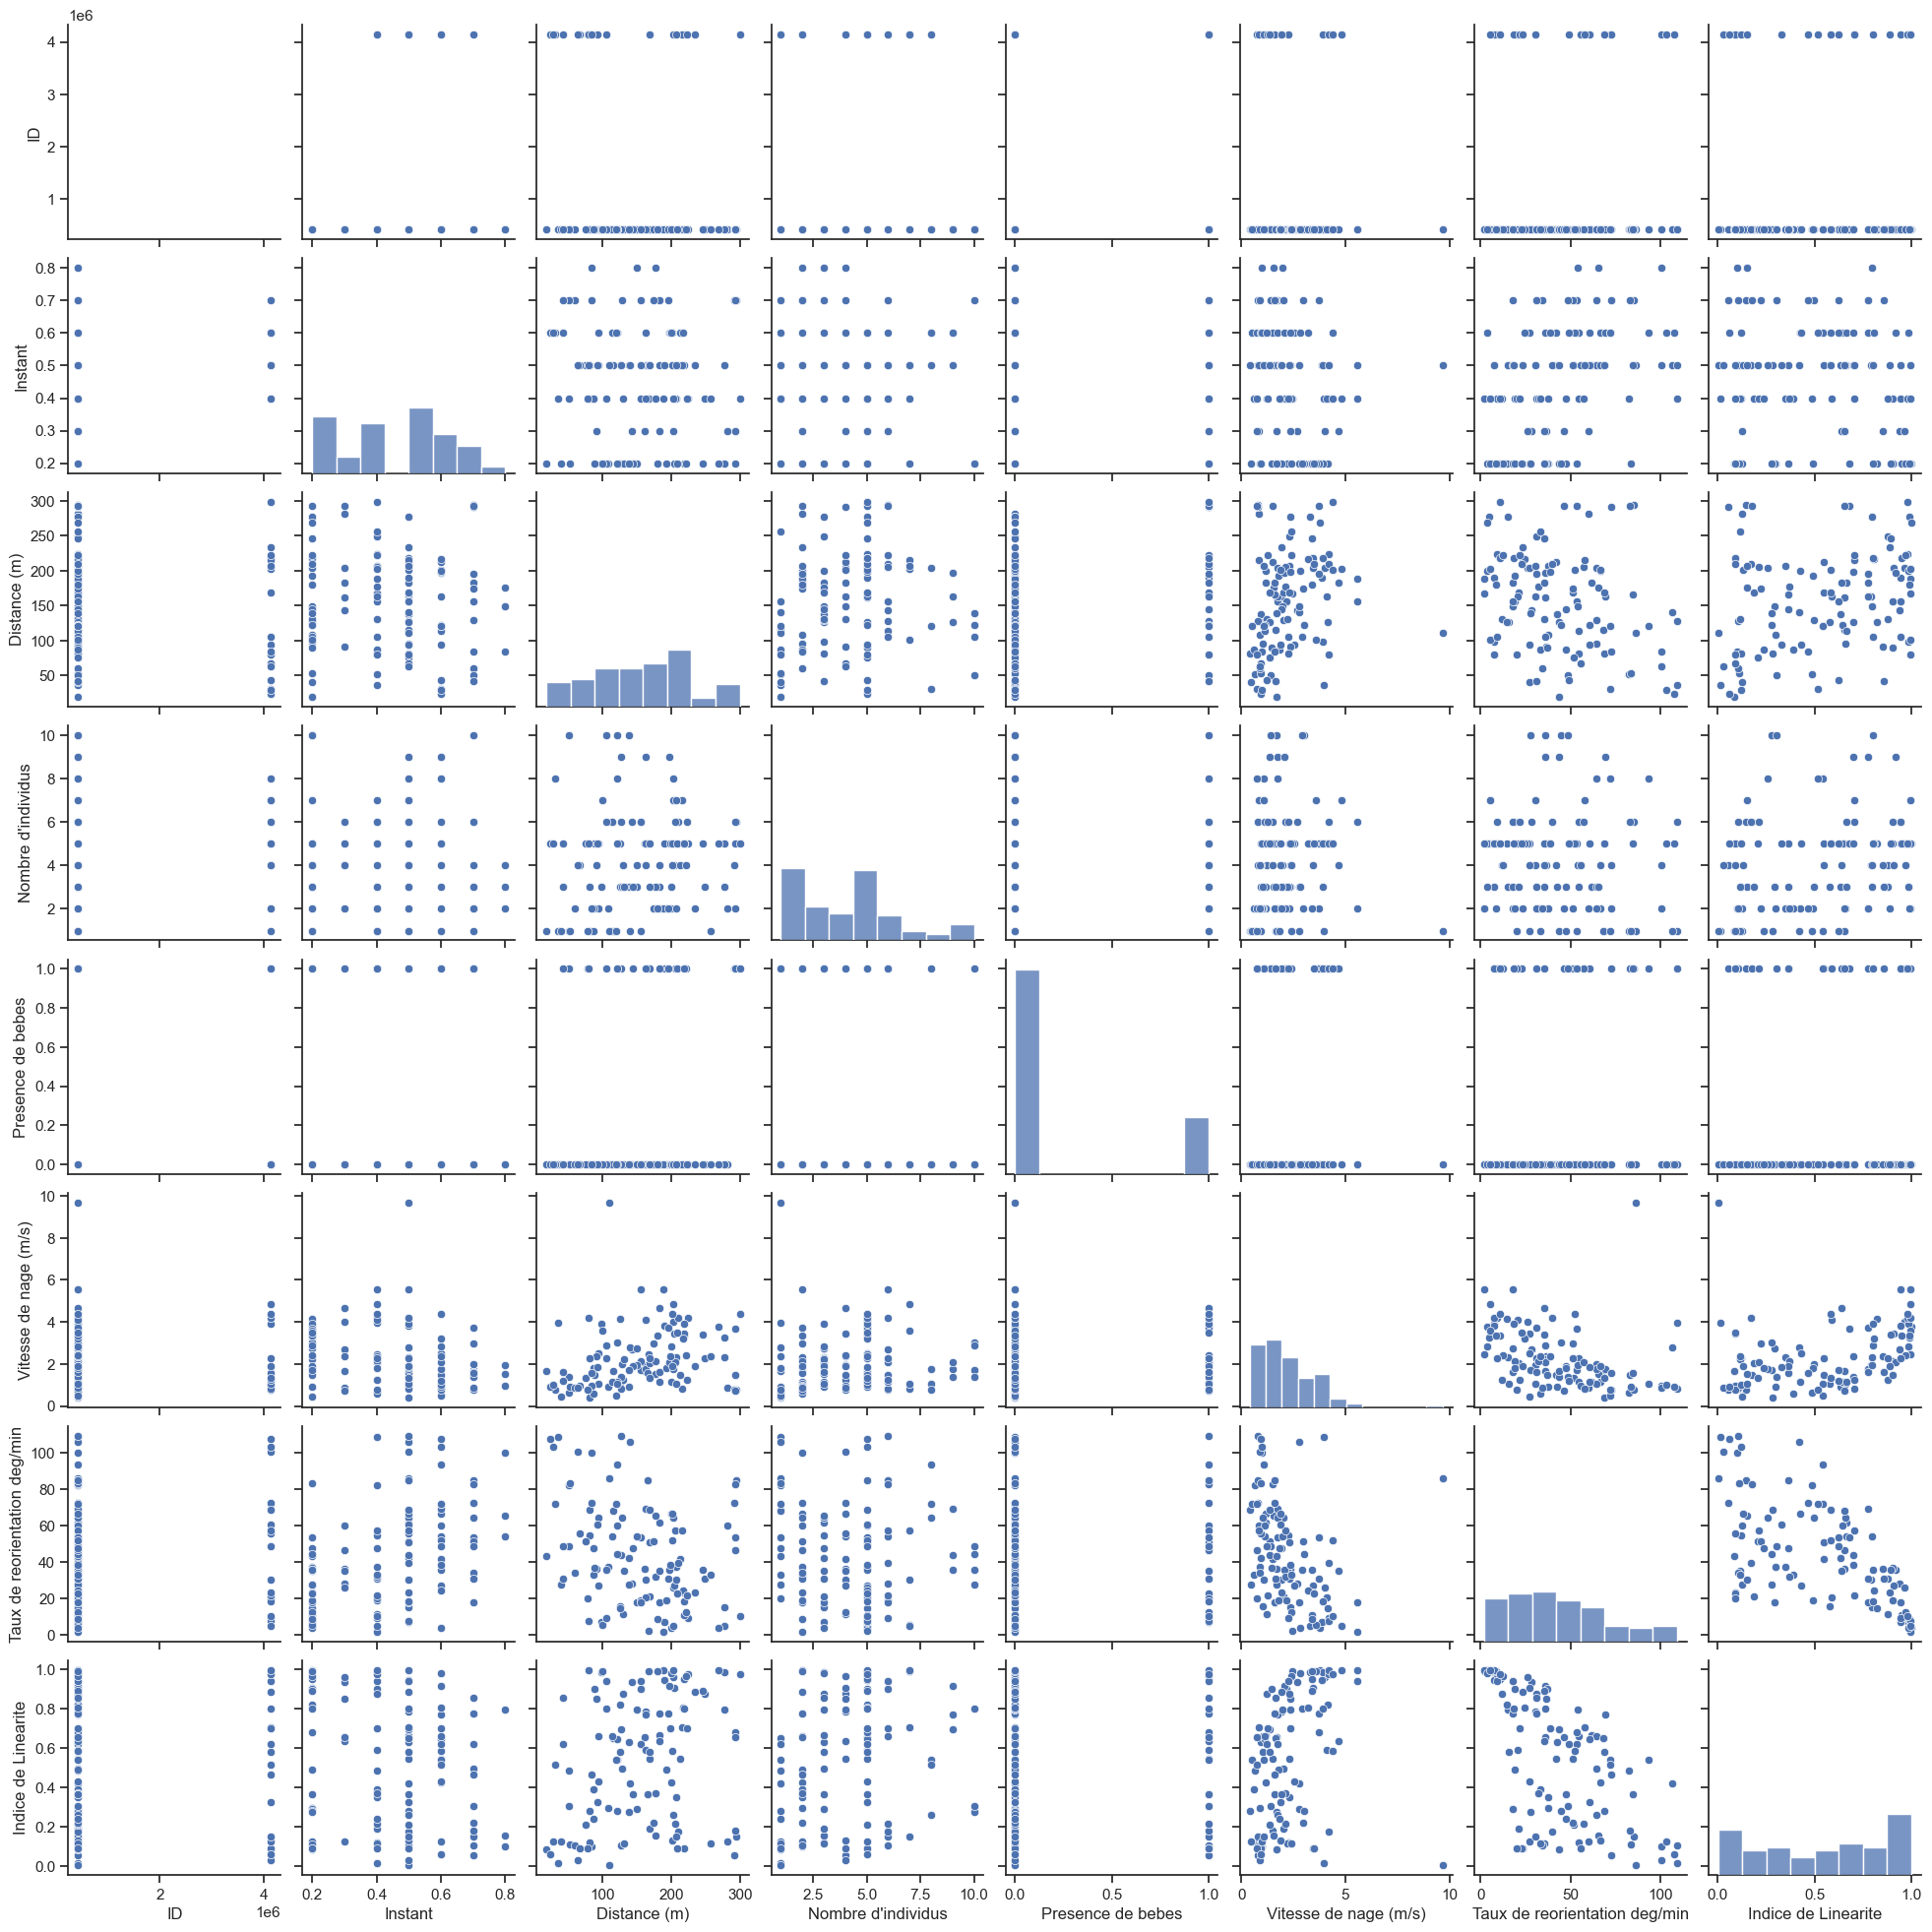

In [99]:
sns.pairplot(fichier)
print("Il n'y a pas assez de données lorsqu'il y a une présence de bébé.")
print("Il semble qu'il y a une relation linéaire entre l'indice de linéarité et le taux de réorientation.")

# III. Statistiques

### Test de Normalité Shapiro-Wilk

H0 : Les données suivent une distribution normale.

H1 : Les données ne suivent pas une distribution normale.

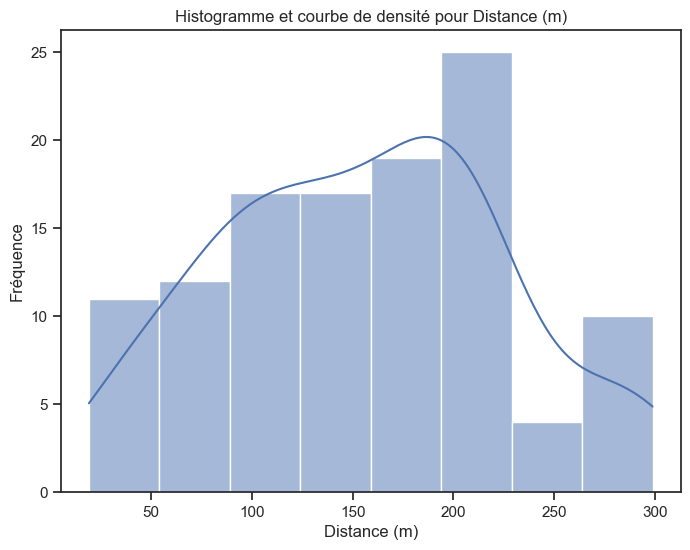

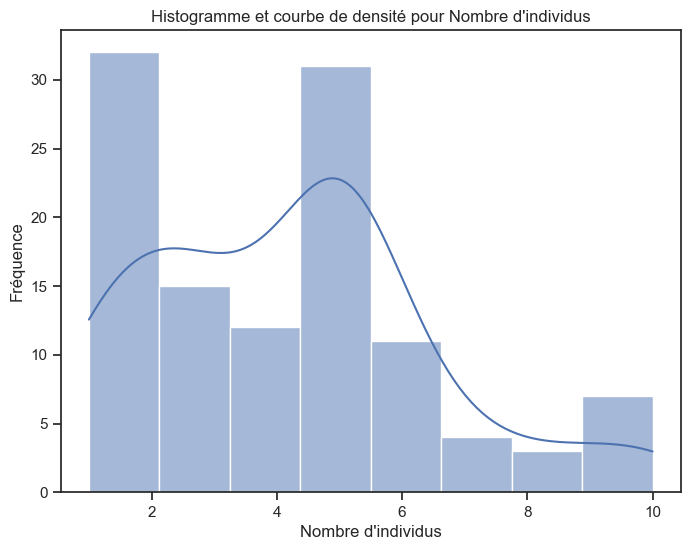

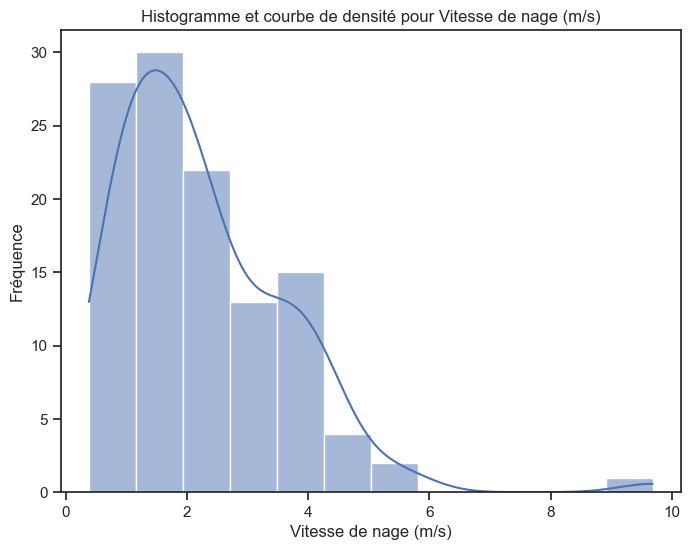

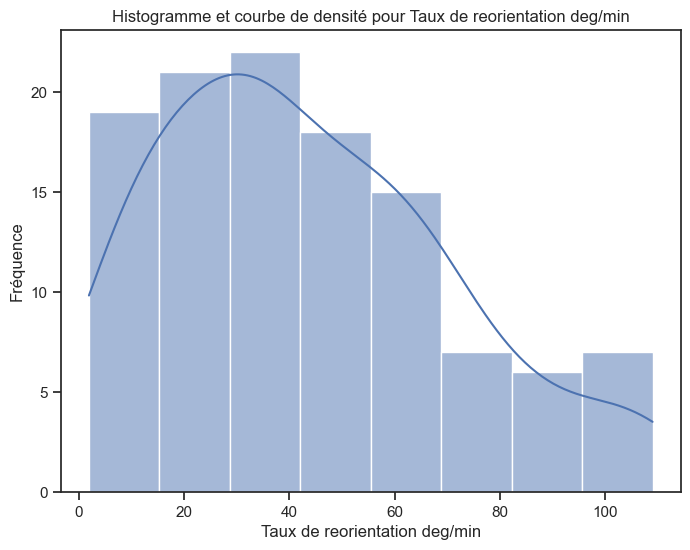

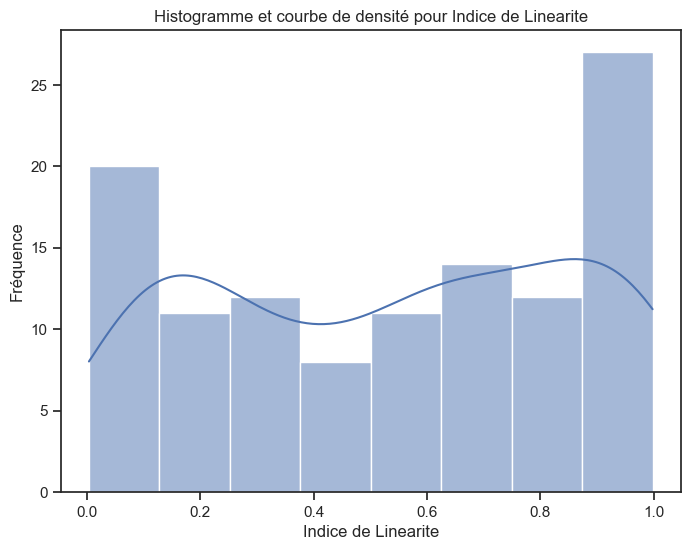

P-valeur de la normalité (Shapiro-Wilk) pour Distance (m): 0.05826598033308983
P-valeur de la normalité (Shapiro-Wilk) pour Nombre d'individus: 1.2941598470206372e-05
P-valeur de la normalité (Shapiro-Wilk) pour Vitesse de nage (m/s): 2.158111911398919e-08
P-valeur de la normalité (Shapiro-Wilk) pour Taux de reorientation deg/min: 0.0005793538293801248
P-valeur de la normalité (Shapiro-Wilk) pour Indice de Linearite: 2.282725517943618e-06


In [100]:
from scipy.stats import shapiro, pearsonr, spearmanr, kendalltau
# Variables quantitatives d'intérêt
var1 = 'Vitesse de nage (m/s)'
var2 = 'Taux de reorientation deg/min'
var3 = 'Indice de Linearite'

# Analyse graphique de la normalité des deux variables
for var in quant_vars:
    if var!='ID' and var!='Instant' and var!='Instant_h' and var != 'Presence de bebes':
        plt.figure(figsize=(8, 6))
        sns.histplot(fichier[var], kde=True)
        plt.xlabel(var)
        plt.ylabel('Fréquence')
        plt.title(f"Histogramme et courbe de densité pour {var}")
        plt.show()

# Vérifier la normalité à l'aide du test de Shapiro-Wilk
for var in quant_vars:
    if var!='ID' and var!='Instant' and var!='Instant_h' and var != 'Presence de bebes':
        _, p_value = shapiro(fichier[var])
        print(f"P-valeur de la normalité (Shapiro-Wilk) pour {var}:", p_value)

D'apres le test de Shapiro-Wilk, la p-valeur est faible, il est peu probable que la distribution des variables soit normale pour :

            Nombre d'individu

            Vitesse 

            Taux de réorientation

            Linéarite

### Y a t-il une corrélation entre variable ?

### Test de corrélation de Spearman

Hypothèses :
 - H0 : Il n'y a pas de corrélation monotone entre les 2 variables.
 - H1 : Il n'y a une corrélation monotone entre les deux variables.

Condition d'utilisation :
 - Les variables sont quantitatives ou ordinales
 - Les variables ne sont pas normalement distribuées
 - La relation entre les 2 variables peut être monotone linéaire ou non.

In [101]:
# Calcul de la corrélation de Spearman
corr, pval = spearmanr(fichier[var2], fichier[var3])
# afficher les résultats
print('Coef. de corrélation de Spearman pour les variables',var2,"et",var3,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

corr, pval = spearmanr(fichier[var1], fichier[var3])
# afficher les résultats
print('Coef. de corrélation de Spearman pour les variables',var1,"et",var3,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

corr, pval = spearmanr(fichier[var1], fichier[var2])
# afficher les résultats
print('Coef. de corrélation de Spearman pour les variables',var1,"et",var2,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

Coef. de corrélation de Spearman pour les variables Taux de reorientation deg/min et Indice de Linearite : -0.6331334332833584
P-valeur associée : 3.147050369568255e-14
----------------------------------------------------------------------------------------------------------------------
Coef. de corrélation de Spearman pour les variables Vitesse de nage (m/s) et Indice de Linearite : 0.460656513848339
P-valeur associée : 2.215008749762287e-07
----------------------------------------------------------------------------------------------------------------------
Coef. de corrélation de Spearman pour les variables Vitesse de nage (m/s) et Taux de reorientation deg/min : -0.5403377258739052
P-valeur associée : 4.582946437485405e-10
----------------------------------------------------------------------------------------------------------------------


### Test de corrélation de Kendall

Hypothèses :
 - H0 : Il n'y a pas de de corrélation monotone entre 2 variable
 - H1 : Il y a une correlation monotone entre 2 variables

Condition d'utilisation :
 - Les 2 variables sont quantitatives et ordinales
 - Les données n'ont pas besoin d'être normalement distribuées
 - La relation entre variable peut être monotone linéaire ou non.

In [102]:
# Calcul de la corrélation de Kendall
corr, pval = kendalltau(fichier[var2], fichier[var3])
# afficher les résultats
print('Coef. de corrélation de Kendall pour les variables',var2,"et",var3,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

corr, pval = kendalltau(fichier[var1], fichier[var3])
# afficher les résultats
print('Coef. de corrélation de Kendall pour les variables',var1,"et",var3,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

corr, pval = kendalltau(fichier[var1], fichier[var2])
# afficher les résultats
print('Coef. de corrélation de Kendall pour les variables',var1,"et",var2,':', corr)
print('P-valeur associée :', pval)
print("----------------------------------------------------------------------------------------------------------------------")

Coef. de corrélation de Kendall pour les variables Taux de reorientation deg/min et Indice de Linearite : -0.4745995423340962
P-valeur associée : 5.4898641570682713e-14
----------------------------------------------------------------------------------------------------------------------
Coef. de corrélation de Kendall pour les variables Vitesse de nage (m/s) et Indice de Linearite : 0.3318077803203662
P-valeur associée : 1.4621000995895664e-07
----------------------------------------------------------------------------------------------------------------------
Coef. de corrélation de Kendall pour les variables Vitesse de nage (m/s) et Taux de reorientation deg/min : -0.3928299008390542
P-valeur associée : 4.842551927301037e-10
----------------------------------------------------------------------------------------------------------------------


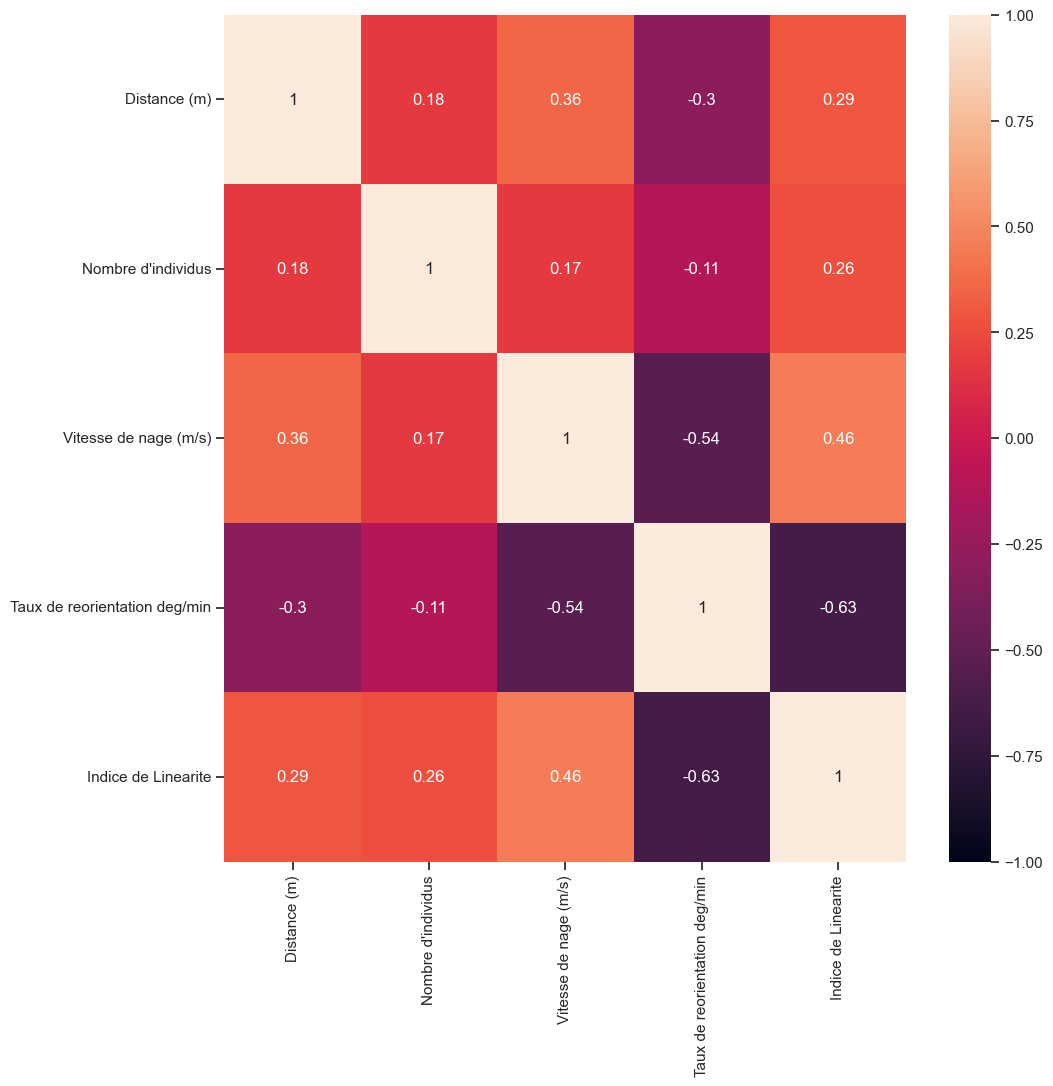

In [103]:
fichier_v=fichier[["Distance (m)","Nombre d'individus","Vitesse de nage (m/s)","Taux de reorientation deg/min","Indice de Linearite"]]

corr_df = fichier_v.corr(method='spearman')

plt.figure(figsize=(11, 11))
h=sns.heatmap(corr_df, annot=True,vmin=-1, vmax=1)

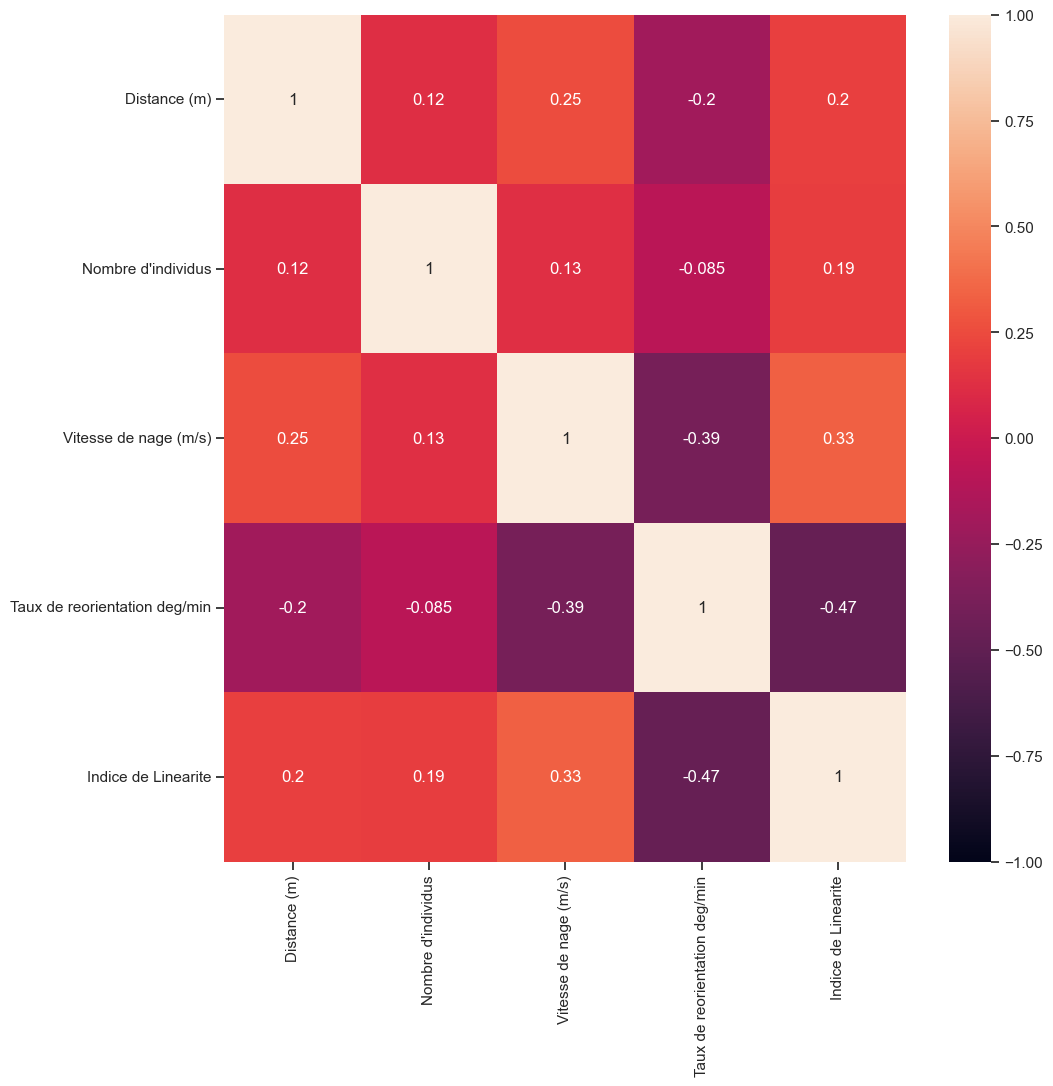

In [104]:
corr_df = fichier_v.corr(method='kendall')

plt.figure(figsize=(11, 11))
h=sns.heatmap(corr_df, annot=True,vmin=-1, vmax=1)

# IV Questions

## IV 1. Combien de fois les individus sont-ils aperçus, en moyenne, au maximum ?

Text(0.5, 1.0, 'Nombre de groupe de dauphin par jour')

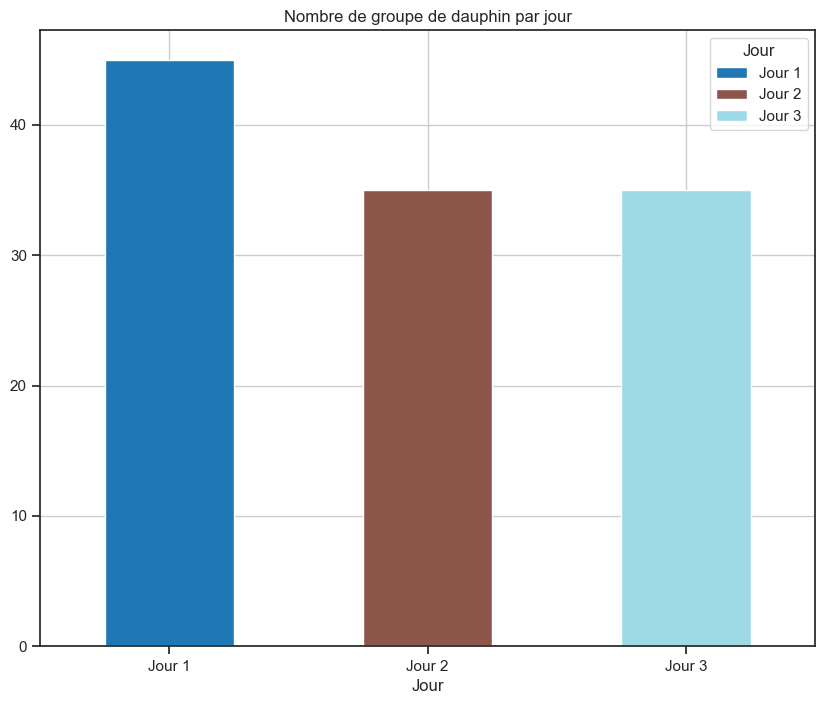

In [105]:
df=fichier.groupby(['Jour'],as_index=False).agg({"Nombre d'individus":'count'})
df_pivot = pd.pivot_table(df, index='Jour', columns='Jour', values="Nombre d'individus") #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

plt.xticks(rotation=-0)
plt.grid()
plt.title("Nombre de groupe de dauphin par jour")

Text(0.5, 1.0, 'Nombre de dauphin par jour')

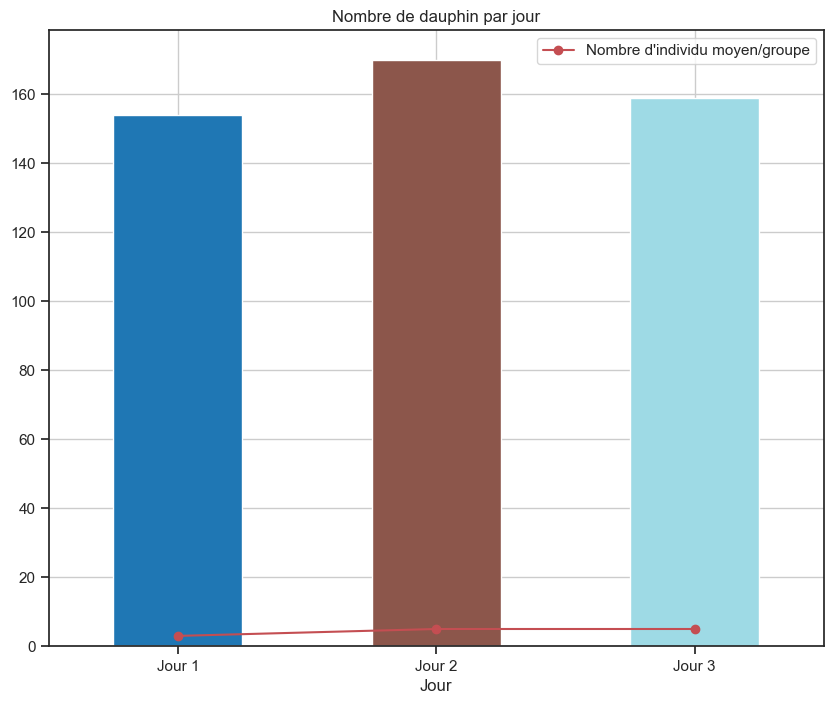

In [106]:
df_groupe=fichier.groupby(['Jour'],as_index=False).agg({"Nombre d'individus":'count'})
df_groupe.rename(columns = {"Nombre d'individus":"Nb groupe"}, inplace = True)

df_nombre=fichier.groupby(['Jour'],as_index=False).agg({"Nombre d'individus":'sum'})

df_nb=df_nombre.merge(df_groupe,how='inner',on='Jour')
df_nb["Nombre d'individu moyen/groupe"]=(df_nb["Nombre d'individus"]/df_nb["Nb groupe"]).round(0)

df_pivot = pd.pivot_table(df_nombre, index='Jour', columns='Jour', values="Nombre d'individus") #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20',legend=False, figsize=(10, 8))
df_nb.plot(x='Jour',y="Nombre d'individu moyen/groupe",ax=ax,color ='r', marker = 'o',legend=True)
plt.xticks(rotation=-0)
plt.grid()
plt.title("Nombre de dauphin par jour")

Text(0.5, 1.0, 'Décompte par heure de la présence de dauphin')

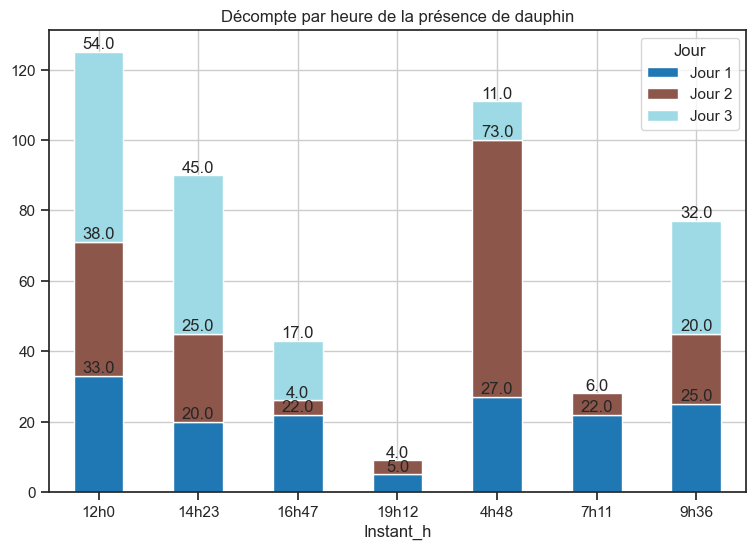

In [107]:
#fig, ax = plt.subplots()
df=fichier.groupby(['Jour','Instant_h'],as_index=False).agg({"Nombre d'individus":'sum'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Jour', values="Nombre d'individus") #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(9, 6))
# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.grid()
plt.title("Décompte par heure de la présence de dauphin")

Text(0.5, 1.0, "Nombre moyen d'individu par heure")

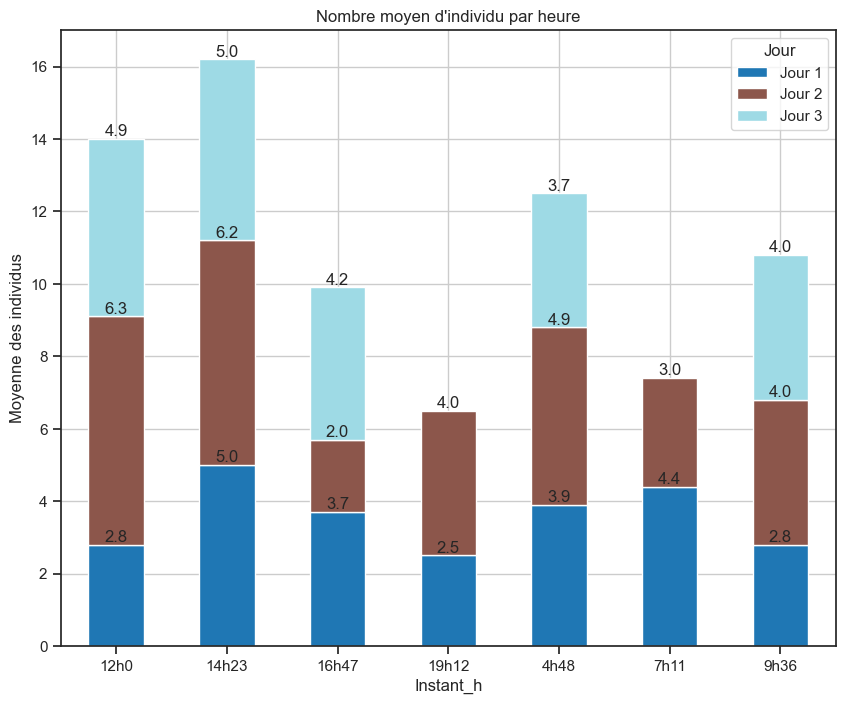

In [108]:
df=fichier.groupby(['Jour','Instant_h'],as_index=False).agg({"Nombre d'individus":'mean'})
df["Nombre d'individus"]=df["Nombre d'individus"].round(1)
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Jour', values="Nombre d'individus") #, aggfunc='mean'

ax=df_pivot.plot.bar(stacked=True, colormap='tab20', figsize=(10, 8))
# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value
        
plt.xticks(rotation=-0)
plt.grid()
plt.gca().set_ylabel('Moyenne des individus')
plt.title("Nombre moyen d'individu par heure")

Text(0.5, 1.0, "Nombre Max de dauphin selon l'heure")

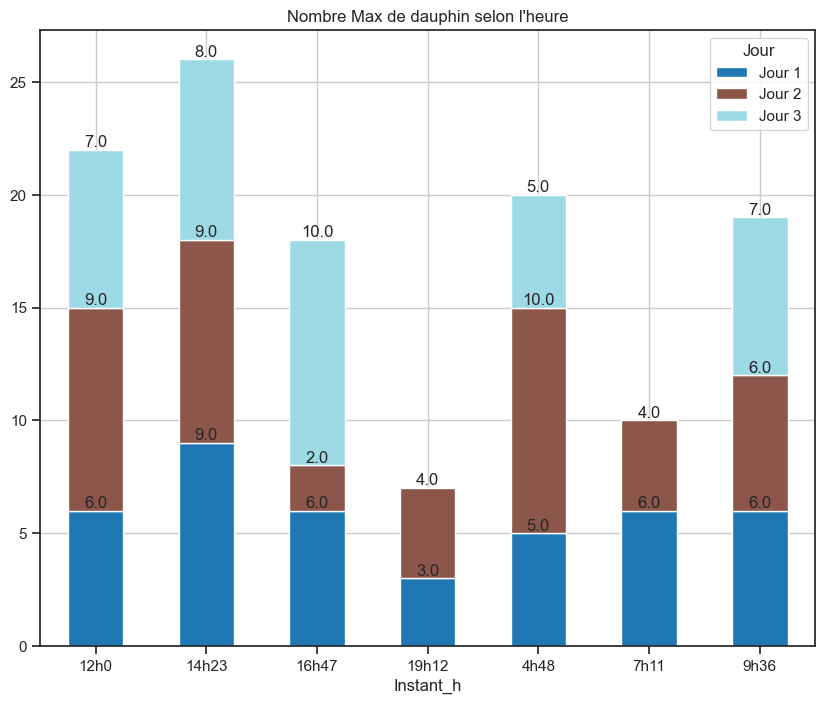

In [109]:
df=fichier.groupby(['Jour','Instant_h'],as_index=False).agg({"Nombre d'individus":'max'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Jour', values="Nombre d'individus")#, aggfunc='mean'
        
ax=df_pivot.plot.bar(stacked=True, colormap='tab20', figsize=(10, 8))
# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value
        
plt.xticks(rotation=-0)
plt.grid()
plt.title("Nombre Max de dauphin selon l'heure")

Text(0.5, 1.0, 'Combien de fois les individus sont aperçus sur les 3 jours')

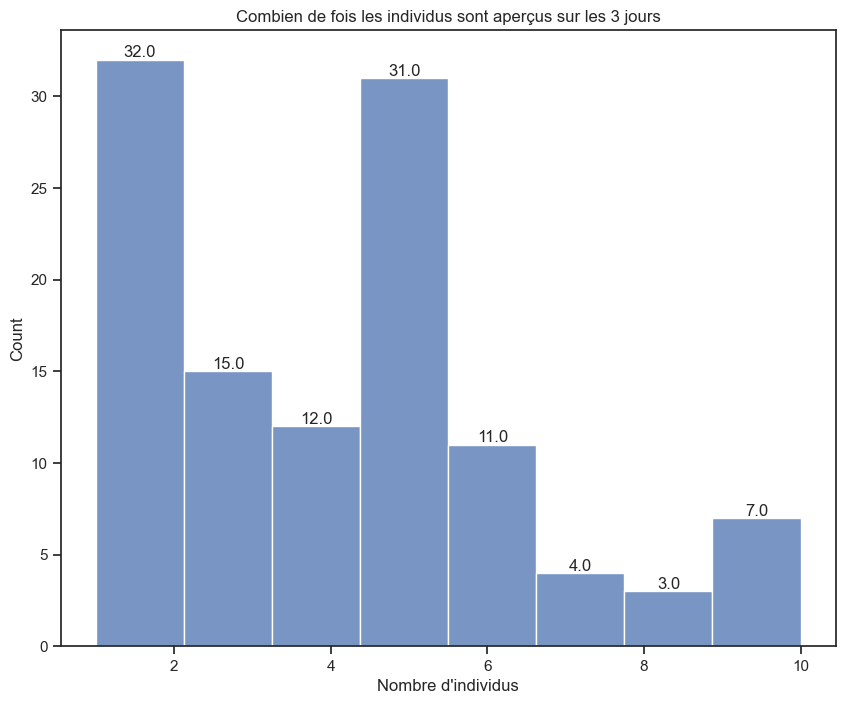

In [110]:
plt.figure(figsize=(10,8))
ax=sns.histplot(data=fichier,x="Nombre d'individus")

# Ajout des annotations de valeurs
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), 
                 ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title("Combien de fois les individus sont aperçus sur les 3 jours")


## IV 2. Quel est le comportement des dauphins en fonction de l’horaire, de la taille du groupe ou la présence de bébé ?

Text(0.5, 1.0, "Comportement des dauphins en fonction de l'heure")

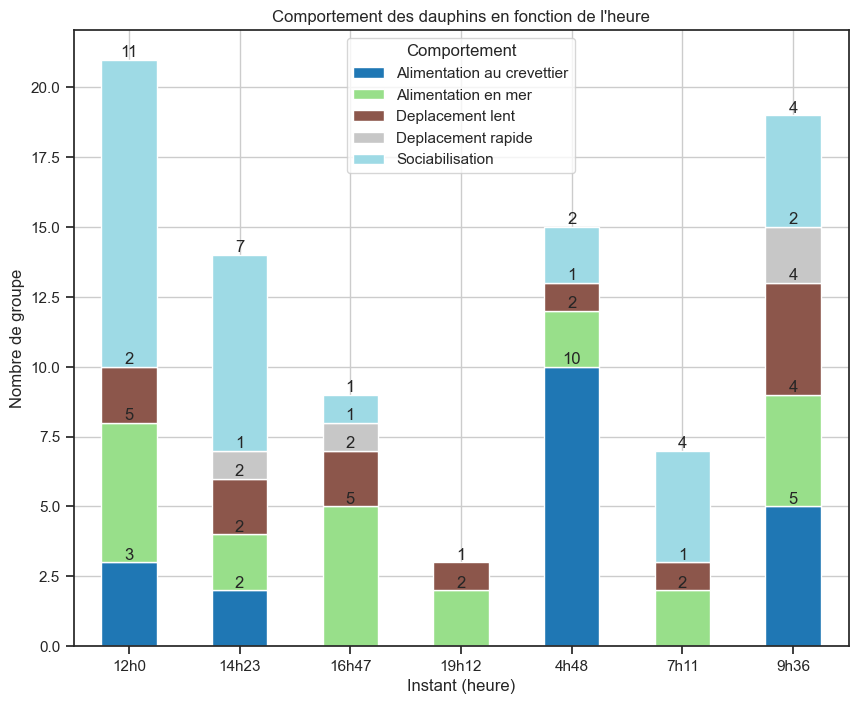

In [111]:
df=fichier.groupby(['Instant_h','Comportement'],as_index=False).agg({"ID":'nunique'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Comportement', values="ID", fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value


plt.xticks(rotation=-0)
plt.gca().set_xlabel('Instant (heure)')
plt.gca().set_ylabel('Nombre de groupe')
plt.grid()
plt.title("Comportement des dauphins en fonction de l'heure")

Text(0.5, 1.0, 'Comportement selon les différentes tailles de groupe de dauphin')

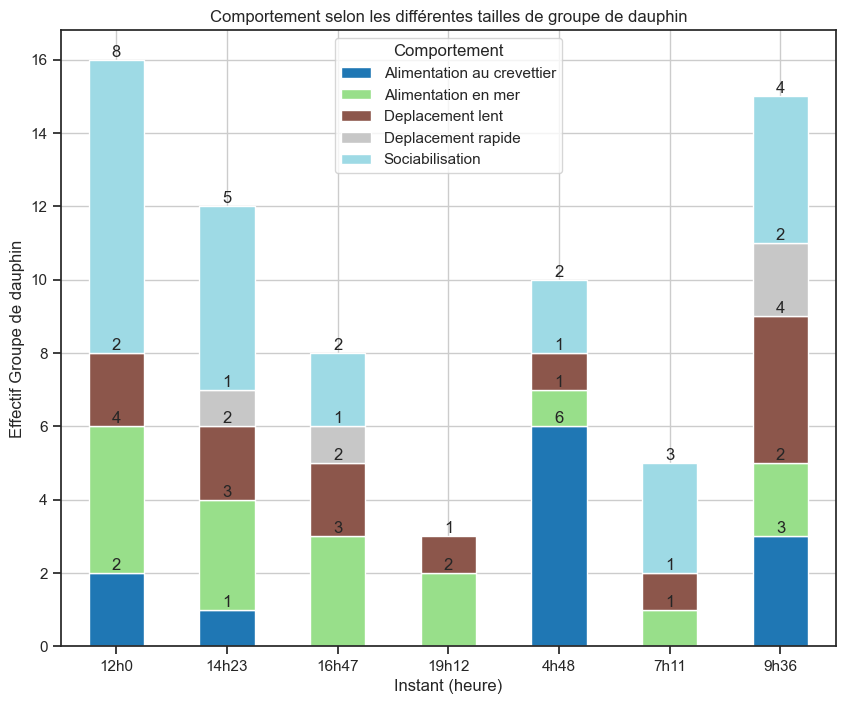

In [112]:
df=fichier.groupby(['Instant_h','Comportement'],as_index=False).agg({"Nombre d'individus":'nunique'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Comportement', values="Nombre d'individus", fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Instant (heure)')
plt.gca().set_ylabel('Effectif Groupe de dauphin')
plt.grid()
plt.title("Comportement selon les différentes tailles de groupe de dauphin")

Text(0.5, 1.0, 'Comportement en présence de bébé')

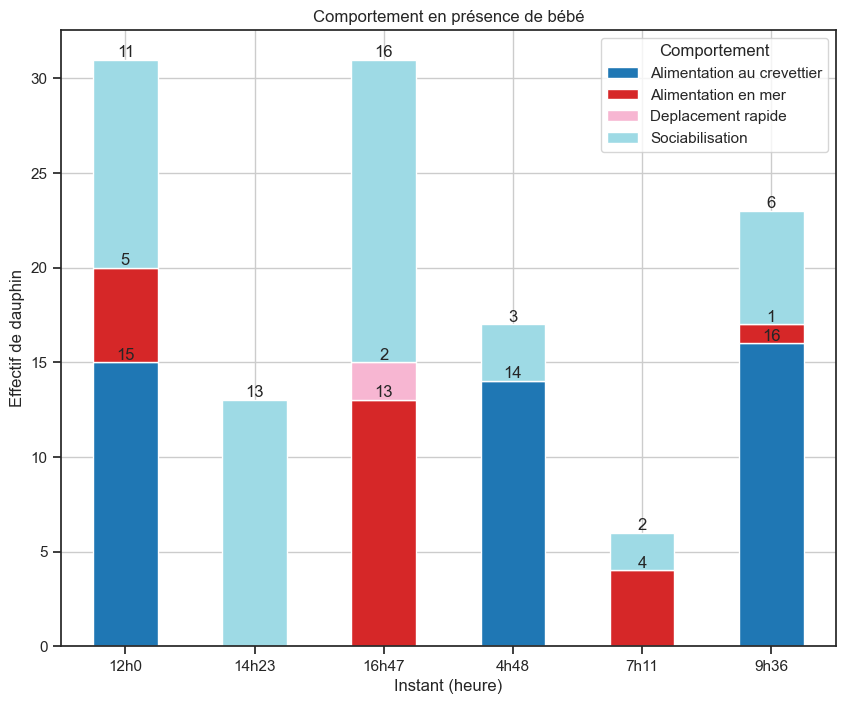

In [113]:
# On veut identifier les cas ou présence de bebe :
df=fichier.loc[(fichier["Presence de bebes"] ==1) ].groupby(['Instant_h',
                    'Comportement'],as_index=False).agg({"Nombre d'individus":'sum'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Comportement', values="Nombre d'individus", fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Instant (heure)')
plt.gca().set_ylabel('Effectif de dauphin')
plt.grid()
plt.title("Comportement en présence de bébé")

Text(0.5, 1.0, "Comportement en l'absence de bébé")

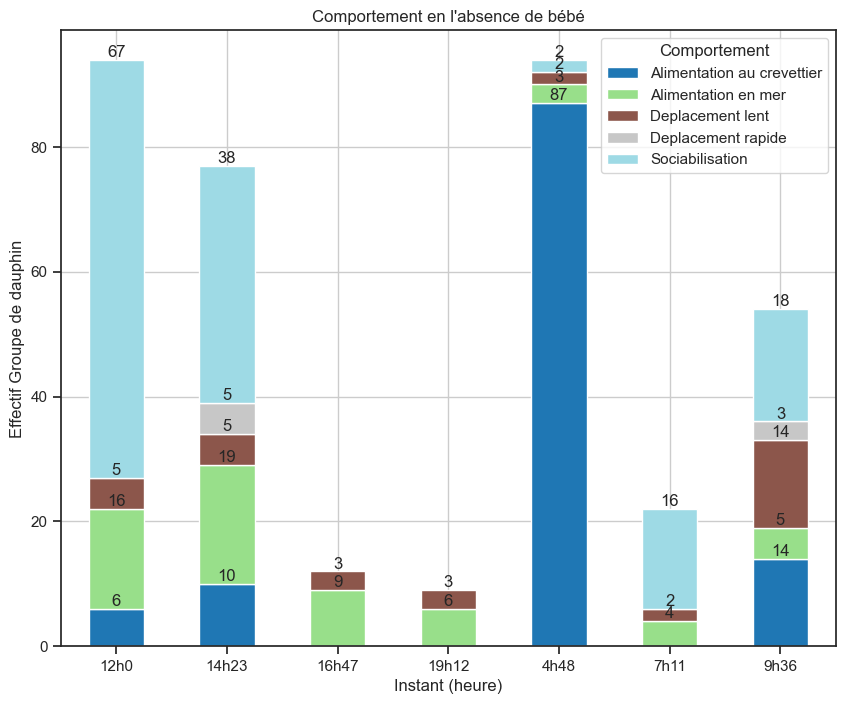

In [114]:
# On veut identifier les cas ou présence de bebe :
df=fichier.loc[(fichier["Presence de bebes"] ==0) ].groupby(['Instant_h',
                    'Comportement'],as_index=False).agg({"Nombre d'individus":'sum'})
df_pivot = pd.pivot_table(df, index='Instant_h', columns='Comportement', values="Nombre d'individus", fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Instant (heure)')
plt.gca().set_ylabel('Effectif Groupe de dauphin')
plt.grid()
plt.title("Comportement en l'absence de bébé")

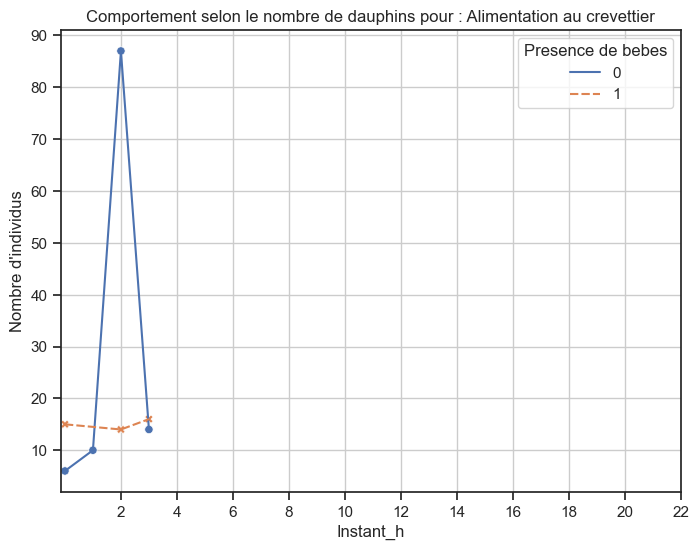

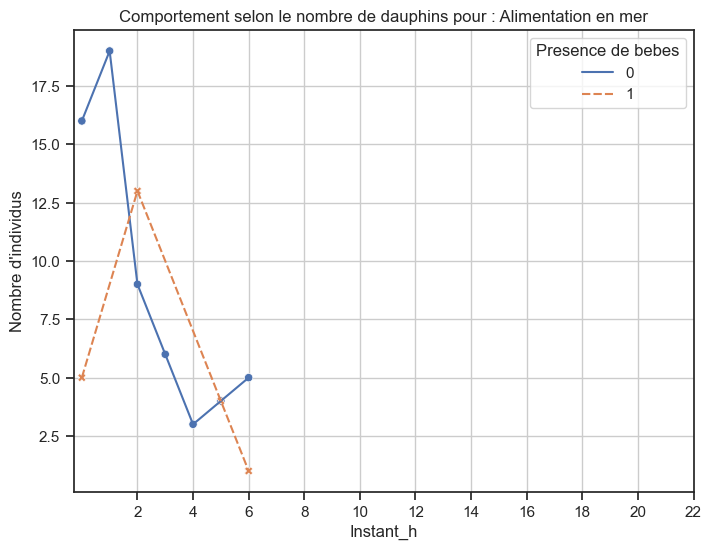

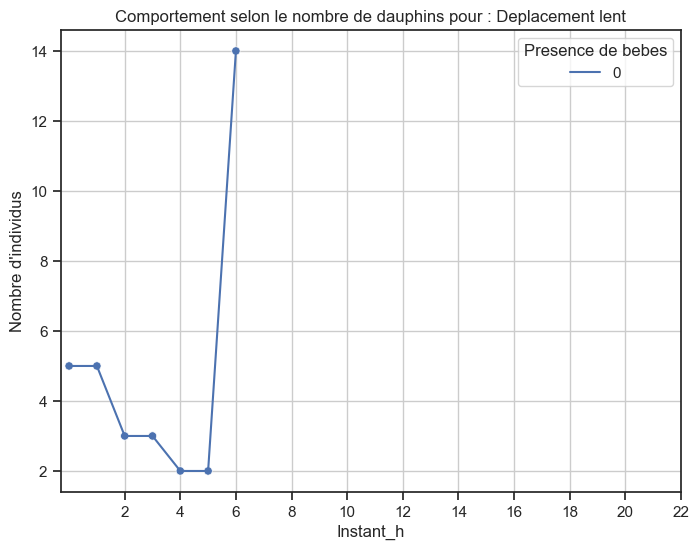

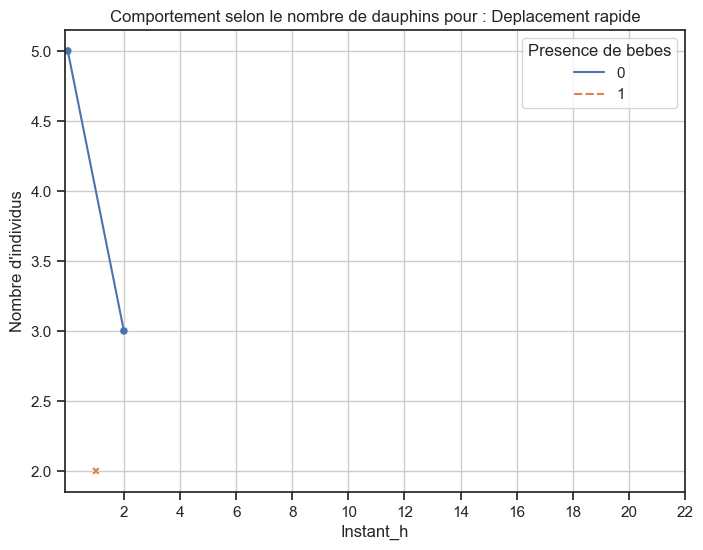

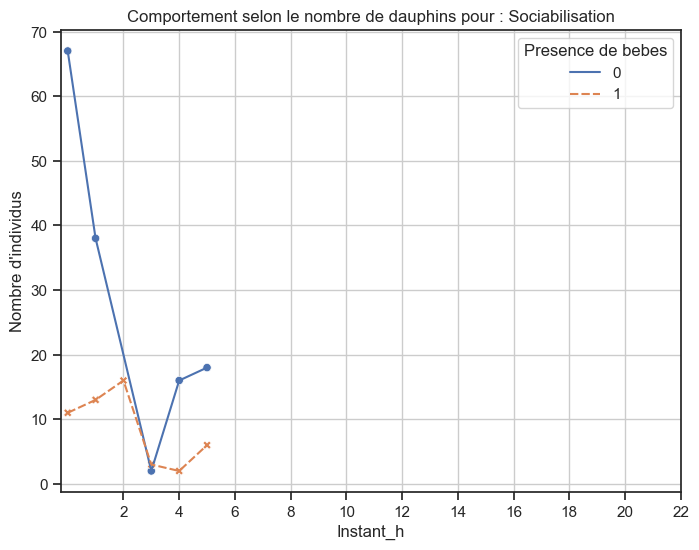

In [115]:
# Sélection des modalités de la variables comportement, on les trie
les_modalites=fichier['Comportement'].value_counts().sort_index().index

axe_abscisse=8
axe_ordonnee=6
for modalite in les_modalites:
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    df=fichier.query("Comportement==@modalite").groupby(['Instant_h','Comportement','Presence de bebes'],as_index=False).agg({"Nombre d'individus":'sum'})

    sns.lineplot(data=df,x='Instant_h',y="Nombre d'individus",hue='Presence de bebes', style='Presence de bebes')
    #x=df['Instant_h']
    #y=df["Nombre d'individus"]
    # je fais apparaitre les points
    sns.scatterplot(data=df,x='Instant_h',y="Nombre d'individus",hue='Presence de bebes',style='Presence de bebes', legend=None )
    #plt.scatter(x, y,c = 'black', marker = markers )
    # J'impose une échelle en abcisse
    plt.xticks([2.0,4.0,6.0,8.0,10.0,12.0,14.0,16.0,18.0,20.0,22.0],
           ['2','4','6', '8', '10','12','14','16','18','20','22'])
    plt.title(f"Comportement selon le nombre de dauphins pour : {modalite}")
    plt.grid()
    plt.show()

## IV 3. Quel est l’impact de la présence des bateaux sur le comportement des dauphins ?

Text(0.5, 1.0, 'Comportement et nombre de groupe de dauphin selon type de bateau')

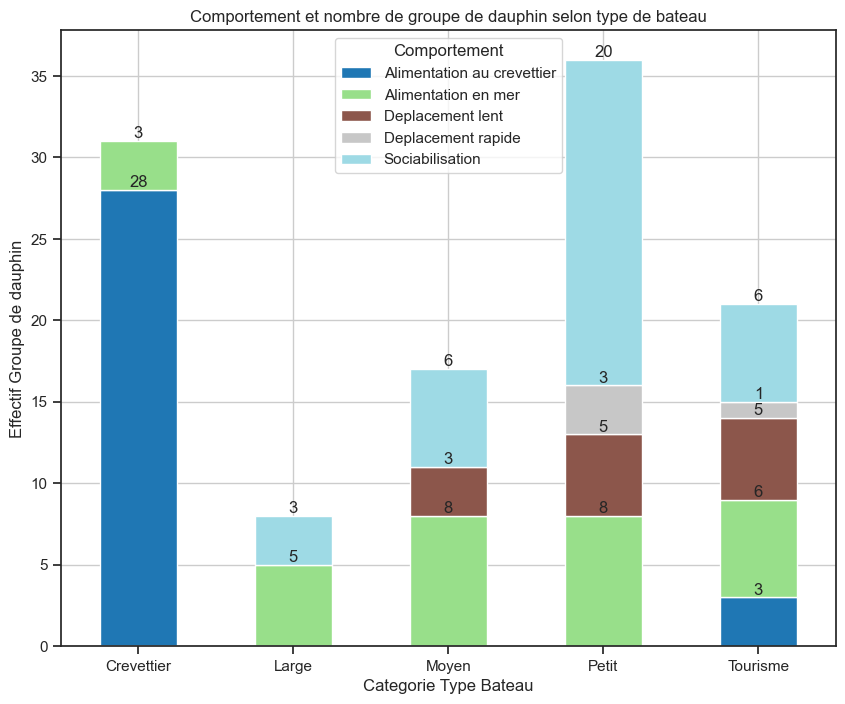

In [116]:
df=fichier.groupby(["Categorie Type Bateau",'Comportement'],as_index=False).agg({"Nombre d'individus":'count'})
df_pivot = pd.pivot_table(df, index='Categorie Type Bateau', columns='Comportement', values="Nombre d'individus", 
                          fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Categorie Type Bateau')
plt.gca().set_ylabel('Effectif Groupe de dauphin')
plt.grid()
plt.title("Comportement et nombre de groupe de dauphin selon type de bateau")

Text(0.5, 1.0, 'Comportement et effectif des dauphins selon le type de bateau')

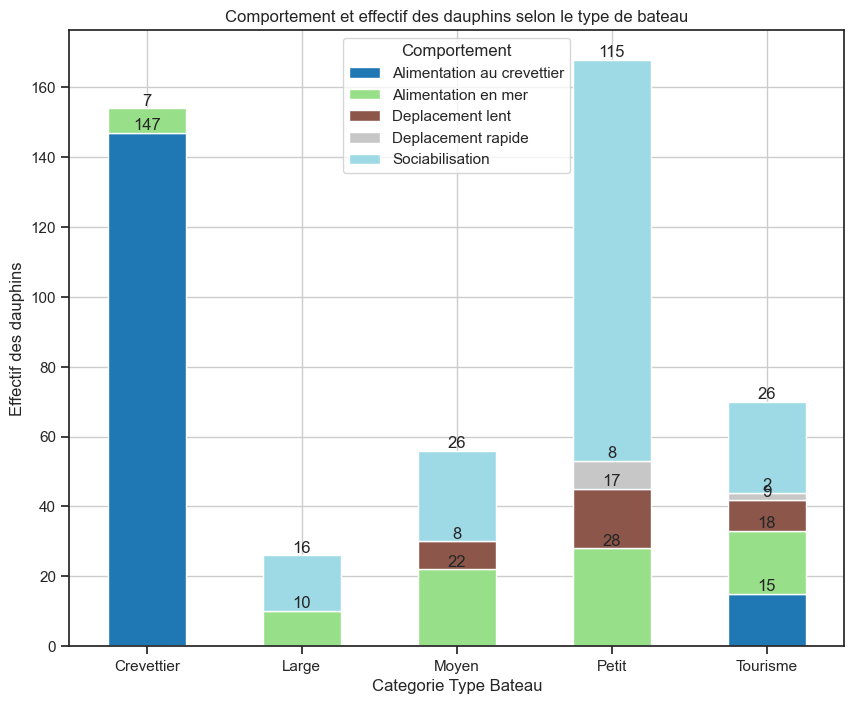

In [117]:
df=fichier.groupby(["Categorie Type Bateau",'Comportement'],as_index=False).agg({"Nombre d'individus":'sum'})
df_pivot = pd.pivot_table(df, index='Categorie Type Bateau', columns='Comportement', values="Nombre d'individus", 
                          fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=True, colormap='tab20', figsize=(10, 8))

# Annotations pour chaque barre empilée
for i in range(len(df_pivot)):
    total_value = 0
    for col in df_pivot.columns:
        value = df_pivot.loc[df_pivot.index[i], col]
        if pd.notnull(value) and np.isfinite(value):
            if value>0:
                ax.text(i, total_value + value, str(value), ha='center', va='bottom')
        total_value += value

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Categorie Type Bateau')
plt.gca().set_ylabel('Effectif des dauphins')
plt.grid()
plt.title("Comportement et effectif des dauphins selon le type de bateau")

Text(0.5, 1.0, 'Vitesse et comportement des dauphins selon le type de bateau')

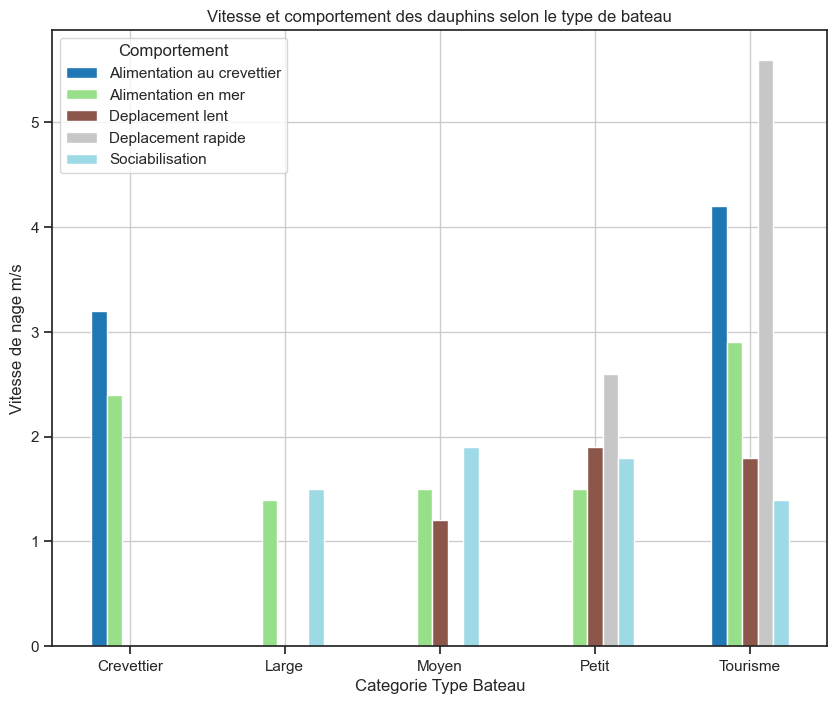

In [118]:
df=fichier.groupby(["Categorie Type Bateau",'Comportement'],as_index=False).agg({"Vitesse de nage (m/s)":'mean'})
df["Vitesse de nage - m/s"]=df["Vitesse de nage (m/s)"].round(1)
df_pivot = pd.pivot_table(df, index='Categorie Type Bateau', columns='Comportement', values="Vitesse de nage - m/s", 
                          fill_value=0) #, aggfunc='sum'

ax=df_pivot.plot(kind='bar',stacked=False, colormap='tab20', figsize=(10, 8))

plt.xticks(rotation=-0)
plt.gca().set_xlabel('Categorie Type Bateau')
plt.gca().set_ylabel('Vitesse de nage m/s')
plt.grid()
plt.title("Vitesse et comportement des dauphins selon le type de bateau")

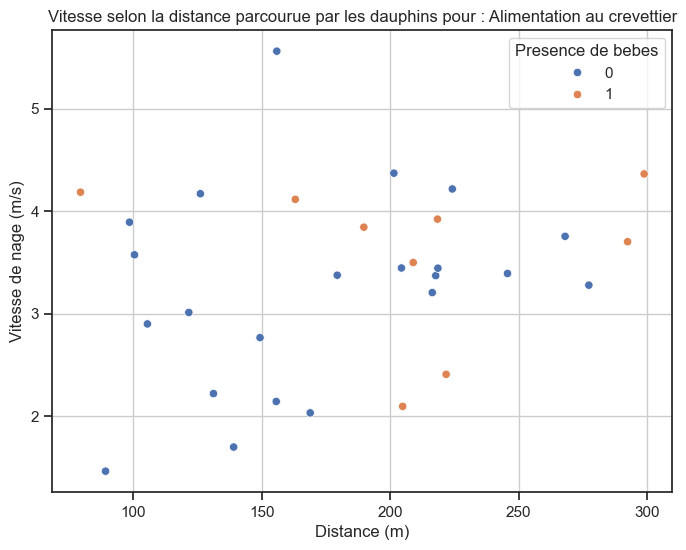

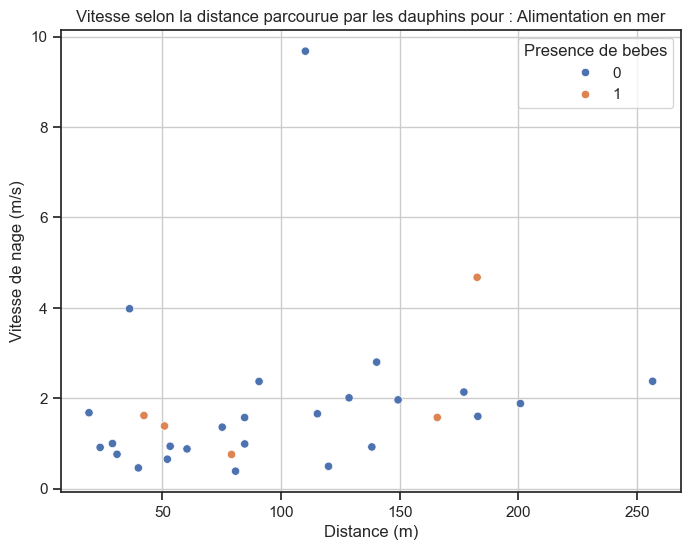

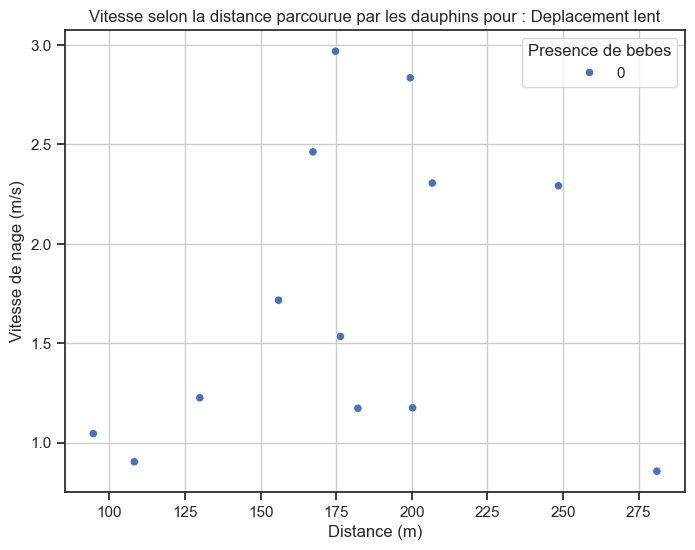

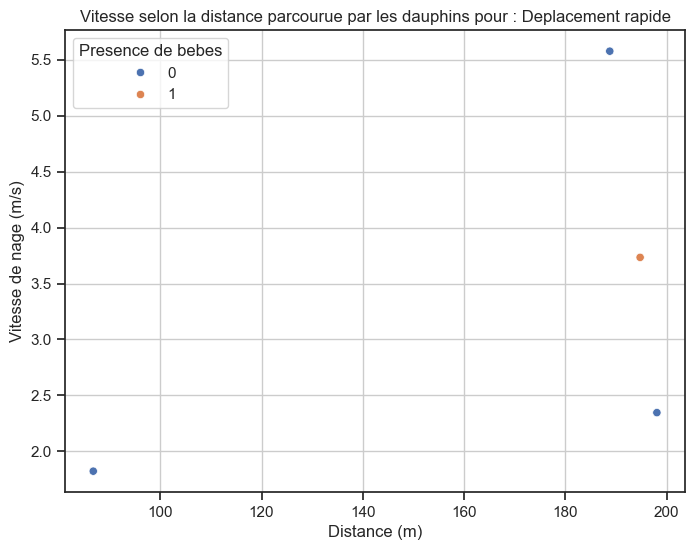

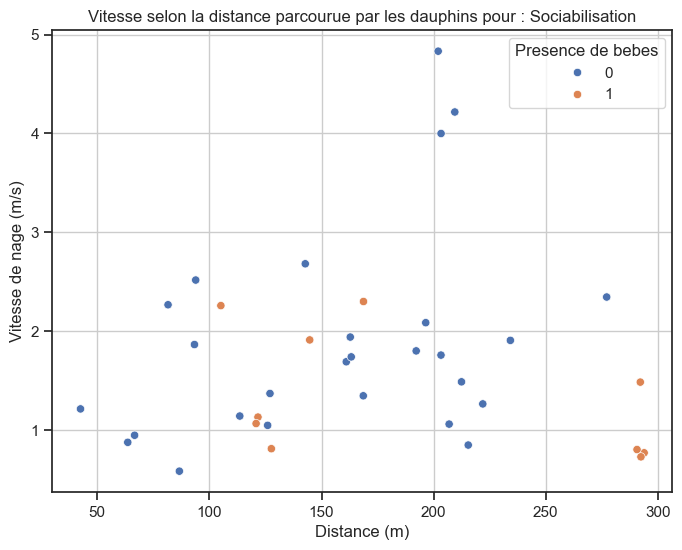

In [119]:
# Sélection des modalités de la variables comportement, on les trie
les_modalites=fichier['Comportement'].value_counts().sort_index().index

axe_abscisse=8
axe_ordonnee=6
for modalite in les_modalites:
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    sns.scatterplot(data=fichier.query("Comportement==@modalite"), x='Distance (m)',
                    y='Vitesse de nage (m/s)',hue='Presence de bebes')
    plt.title(f"Vitesse selon la distance parcourue par les dauphins pour : {modalite}")
    plt.grid()
    plt.show()

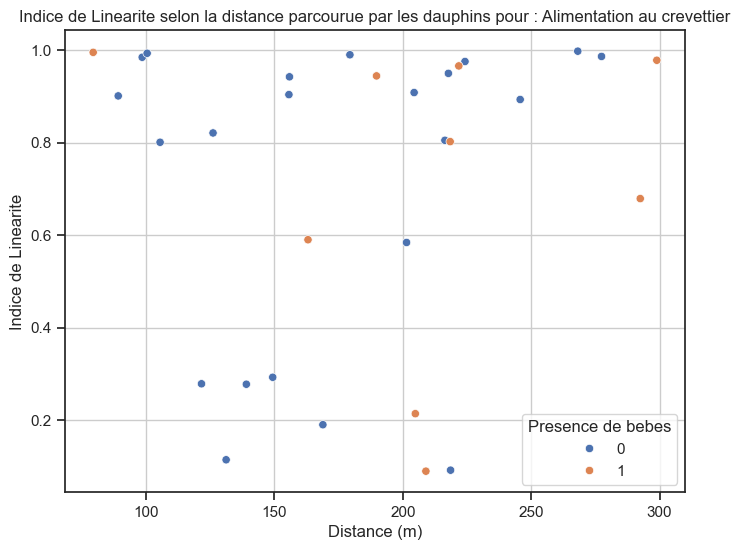

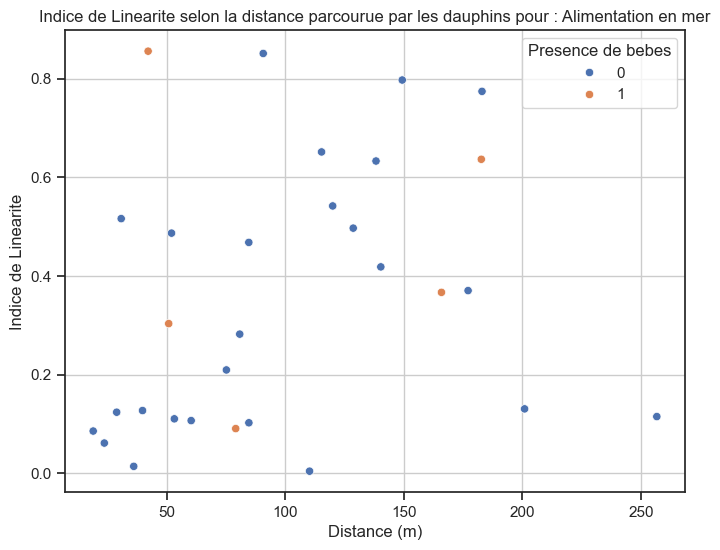

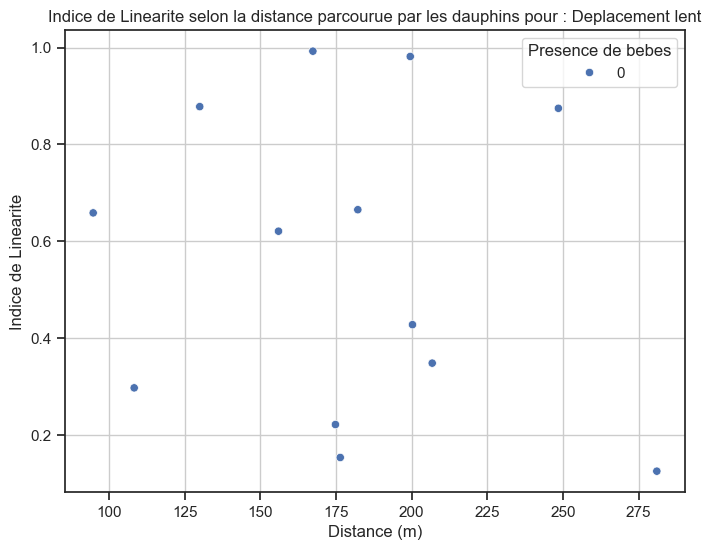

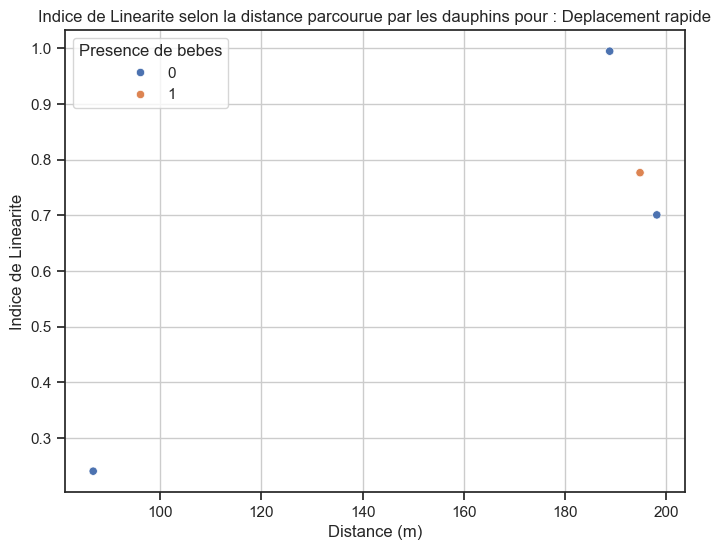

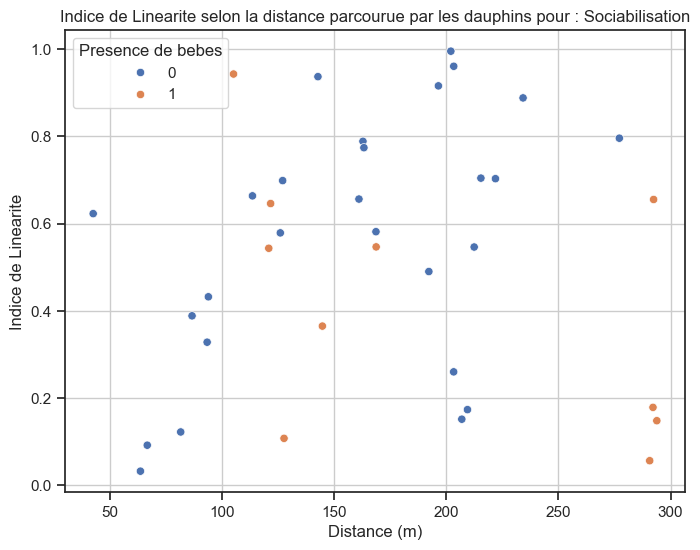

In [120]:
# Sélection des modalités de la variables comportement, on les trie
les_modalites=fichier['Comportement'].value_counts().sort_index().index

axe_abscisse=8
axe_ordonnee=6
for modalite in les_modalites:
    plt.figure(figsize=(axe_abscisse,axe_ordonnee))
    sns.scatterplot(data=fichier.query("Comportement==@modalite"), x='Distance (m)',
                    y='Indice de Linearite',hue='Presence de bebes')
    plt.title(f"Indice de Linearite selon la distance parcourue par les dauphins pour : {modalite}")
    plt.grid()
    plt.show()